In [8]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import datetime as dt

# from tqdm.notebook import tqdm
# tqdm.pandas()

# Set Pandas options
# pd.set_option('max_columns', None)
# pd.set_option('max_rows', 999)

# statistical tests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

# Model building
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX

# Model Evaluation
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

# skip warning messages
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Load the dataset
dataset = pd.read_csv("Total Emissions Per Country (2000-2020).csv")

In [10]:
# Preview the dataset
dataset.head()

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,0.520,0.5267,0.8200,0.9988,0.8225,1.1821,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,0.117,0.1185,0.1845,0.2247,0.1851,0.2660,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,0.637,0.6452,1.0045,1.2235,1.0075,1.4481,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284


In [11]:
# AMke a copy of the dataset for wrangling
data = dataset.copy()

In [12]:
# check for empty data points
data.isnull().sum()

Area          0
Item          0
Element       0
Unit          0
2000       3188
2001       4727
2002       4628
2003       4607
2004       4602
2005       4334
2006       4292
2007       4450
2008       4469
2009       4482
2010       4051
2011       4629
2012       4151
2013       4264
2014       4386
2015       4476
2016       4513
2017       4689
2018       4741
2019       4777
2020       5094
dtype: int64

In [13]:
# drop empty data points
data = data.dropna()

In [14]:
data.isnull().sum()

Area       0
Item       0
Element    0
Unit       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
dtype: int64

In [15]:
data.shape

(52692, 25)

In [16]:
# check for duplicates
data.duplicated().sum()

2

In [17]:
# drop duplicates
data = data.drop_duplicates()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52690 entries, 0 to 58764
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     52690 non-null  object 
 1   Item     52690 non-null  object 
 2   Element  52690 non-null  object 
 3   Unit     52690 non-null  object 
 4   2000     52690 non-null  float64
 5   2001     52690 non-null  float64
 6   2002     52690 non-null  float64
 7   2003     52690 non-null  float64
 8   2004     52690 non-null  float64
 9   2005     52690 non-null  float64
 10  2006     52690 non-null  float64
 11  2007     52690 non-null  float64
 12  2008     52690 non-null  float64
 13  2009     52690 non-null  float64
 14  2010     52690 non-null  float64
 15  2011     52690 non-null  float64
 16  2012     52690 non-null  float64
 17  2013     52690 non-null  float64
 18  2014     52690 non-null  float64
 19  2015     52690 non-null  float64
 20  2016     52690 non-null  float64
 21  2017     52690 no

In [19]:
data

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,5.200000e-01,5.267000e-01,8.200000e-01,9.988000e-01,8.225000e-01,1.182100e+00,...,1.032100e+00,1.372600e+00,1.401800e+00,1.458400e+00,1.242400e+00,1.194000e+00,1.061700e+00,8.988000e-01,1.217600e+00,1.317000e+00
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,1.170000e-01,1.185000e-01,1.845000e-01,2.247000e-01,1.851000e-01,2.660000e-01,...,2.322000e-01,3.088000e-01,3.154000e-01,3.281000e-01,2.795000e-01,2.687000e-01,2.389000e-01,2.022000e-01,2.740000e-01,2.963000e-01
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,6.370000e-01,6.452000e-01,1.004500e+00,1.223500e+00,1.007500e+00,1.448100e+00,...,1.264300e+00,1.681500e+00,1.717300e+00,1.786500e+00,1.522000e+00,1.462700e+00,1.300500e+00,1.101100e+00,1.491600e+00,1.613300e+00
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,1.688070e+02,1.709884e+02,2.661975e+02,3.242195e+02,2.669995e+02,3.837498e+02,...,3.350379e+02,4.455958e+02,4.550727e+02,4.734174e+02,4.033181e+02,3.876130e+02,3.446447e+02,2.917838e+02,3.952689e+02,4.275284e+02
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,1.688070e+02,1.709884e+02,2.661975e+02,3.242195e+02,2.669995e+02,3.837498e+02,...,3.350379e+02,4.455958e+02,4.550727e+02,4.734174e+02,4.033181e+02,3.876130e+02,3.446447e+02,2.917838e+02,3.952689e+02,4.275284e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58760,OECD,All sectors without LULUCF,Emissions (CO2),kilotonnes,1.334328e+07,1.326305e+07,1.332979e+07,1.352237e+07,1.366651e+07,1.369481e+07,...,1.289801e+07,1.270146e+07,1.274243e+07,1.261664e+07,1.253301e+07,1.241227e+07,1.243658e+07,1.254684e+07,1.217070e+07,1.088919e+07
58761,OECD,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),kilotonnes,3.941893e+05,3.882647e+05,4.176531e+05,4.392191e+05,4.672796e+05,5.080909e+05,...,7.759070e+05,7.826597e+05,8.006688e+05,8.326775e+05,8.546258e+05,8.741566e+05,8.884415e+05,9.049044e+05,9.172806e+05,9.208261e+05
58762,OECD,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2.145052e+06,2.126567e+06,2.093083e+06,2.038232e+06,2.047953e+06,2.008645e+06,...,1.980459e+06,1.971959e+06,1.922551e+06,1.934854e+06,1.924370e+06,1.880327e+06,1.915982e+06,1.923635e+06,1.882769e+06,1.825476e+06
58763,OECD,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,8.535273e+05,8.496131e+05,8.400758e+05,8.124412e+05,8.328157e+05,8.123489e+05,...,8.344119e+05,8.490201e+05,8.204159e+05,8.325680e+05,8.289014e+05,8.218071e+05,8.400423e+05,8.349622e+05,8.118189e+05,8.009744e+05


In [20]:
# find number of categories in categorical values
categorical_features = [feature for feature in data.columns if data[feature].dtype=='O']

In [21]:
categorical_features

['Area', 'Item', 'Element', 'Unit']

In [22]:
for feature in categorical_features:
    print(f"Number of categories in {feature}: ", data[feature].nunique())
    print(f"Names of categories in {feature}: ", data[feature].unique(),"\n")

Number of categories in Area:  268
Names of categories in Area:  ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Channel Islands'
 'Chile' 'China' 'China, Hong Kong SAR' 'China, Macao SAR'
 'China, mainland' 'China, Taiwan Province of' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "C?e d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equato

From this separation, we can see that tracking emissions by category will be quite cumbersome as there are 42 categories and as such, it will be better to classify by Element which has 9 just unique values.

In [23]:
# Stack the years in one column to simplify the data
stacked_yr_data = pd.melt(data, 
               id_vars=['Area', 'Item', 'Element'],
               value_vars=data.iloc[:,4:],
               var_name='Year',
               value_name='Total_Emissions_KT'
)

In [24]:
stacked_yr_data

,Area,Item,Element,Year,Total_Emissions_KT
0,Afghanistan,Crop Residues,Direct emissions (N2O),2000,5.200000e-01
1,Afghanistan,Crop Residues,Indirect emissions (N2O),2000,1.170000e-01
2,Afghanistan,Crop Residues,Emissions (N2O),2000,6.370000e-01
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),2000,1.688070e+02
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),2000,1.688070e+02
...,...,...,...,...,...
1106485,OECD,All sectors without LULUCF,Emissions (CO2),2020,1.088919e+07
1106486,OECD,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),2020,9.208261e+05
1106487,OECD,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),2020,1.825476e+06
1106488,OECD,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),2020,8.009744e+05


Text(0, 0.5, 'Total Emissions (KT)')

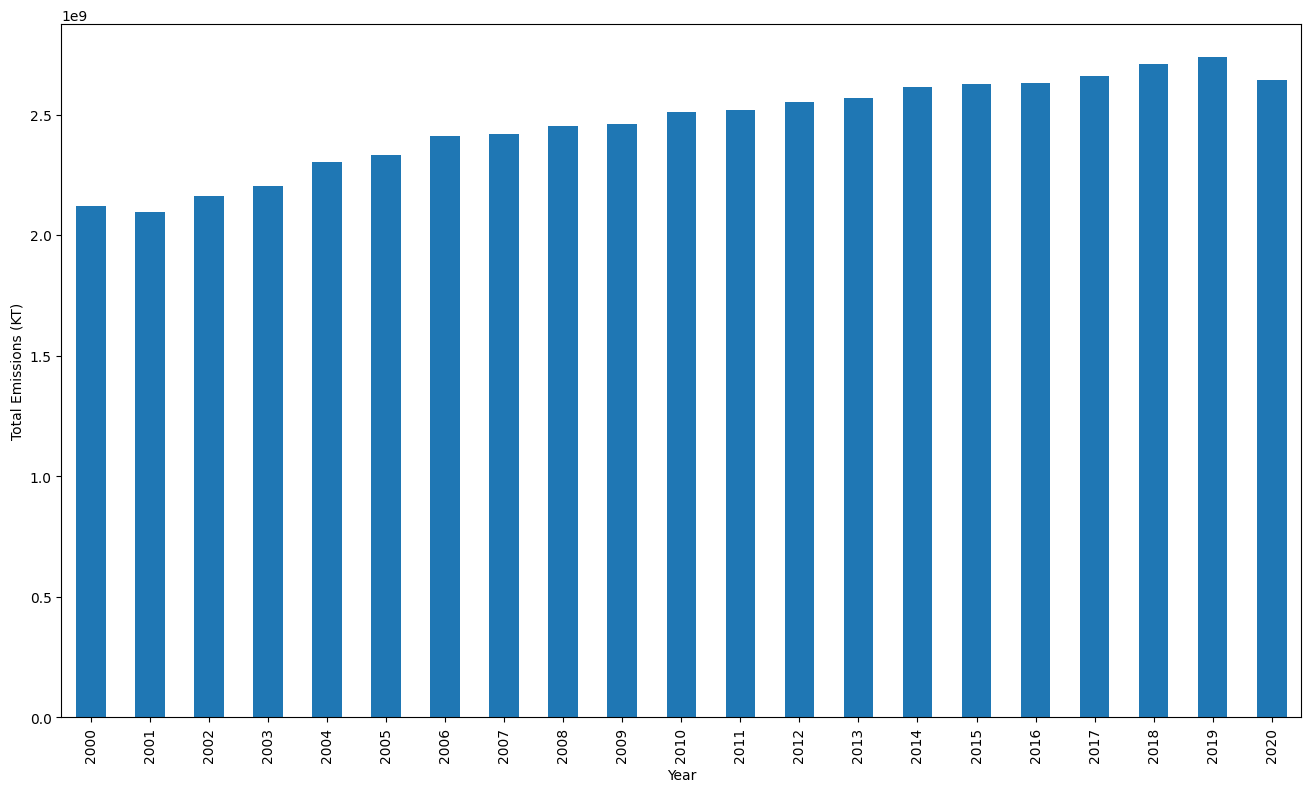

In [25]:
# plot the overall progression of emissions globally by year just to get a sense of the data
plt.figure(figsize=(16,9))
stacked_yr_data.groupby(['Year'])['Total_Emissions_KT'].sum().plot.bar()
plt.xlabel('Year')
plt.ylabel('Total Emissions (KT)')

###### Use Afghanistan data as sample for generalization later on

In [26]:
# Get afghanistan data from data
afghanistan_data = stacked_yr_data[stacked_yr_data['Area']=='Afghanistan']

In [27]:
afghanistan_data.head(500)

,Area,Item,Element,Year,Total_Emissions_KT
0,Afghanistan,Crop Residues,Direct emissions (N2O),2000,0.5200
1,Afghanistan,Crop Residues,Indirect emissions (N2O),2000,0.1170
2,Afghanistan,Crop Residues,Emissions (N2O),2000,0.6370
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),2000,168.8070
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),2000,168.8070
...,...,...,...,...,...
105473,Afghanistan,Food Packaging,Emissions (CO2),2002,1.9442
105474,Afghanistan,Food Packaging,Emissions (CO2eq) from CH4 (AR5),2002,0.0168
105475,Afghanistan,Food Packaging,Emissions (CO2eq) from N2O (AR5),2002,0.0000
105476,Afghanistan,Food Packaging,Emissions (CO2eq) (AR5),2002,1.9610


By observing the data, we can see that some emission categories are actually subcategories for the others:

- Summation of "Direct emissions(XXX)" and "Indirect emissions(XXX)" give "Emissions(XXX)"
- "Emissions (CO2eq) from XXX (AR5)" give "Emissions (CO2eq) (AR5)"	

Thus we will filter out the sub-data which inflates the sum of Total Emission by Element

In [28]:
# Remove repition of data appearing as component and sum of same value, leaving only sums 
data_no_emission_reps =  afghanistan_data[~afghanistan_data['Element'].str.\
                                          contains('|'.join(['Direct', 'Indirect', 'from']))]
data_no_emission_reps

,Area,Item,Element,Year,Total_Emissions_KT
2,Afghanistan,Crop Residues,Emissions (N2O),2000,0.6370
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),2000,168.8070
5,Afghanistan,Rice Cultivation,Emissions (CH4),2000,18.2000
7,Afghanistan,Rice Cultivation,Emissions (CO2eq) (AR5),2000,509.6000
8,Afghanistan,Burning - Crop residues,Emissions (CH4),2000,2.6471
...,...,...,...,...,...
1053994,Afghanistan,All sectors with LULUCF,Emissions (CO2eq) (AR5),2020,32584.8428
1053995,Afghanistan,All sectors without LULUCF,Emissions (CH4),2020,662.7644
1053996,Afghanistan,All sectors without LULUCF,Emissions (N2O),2020,16.7350
1053997,Afghanistan,All sectors without LULUCF,Emissions (CO2),2020,9438.0000


In [29]:
# Check new number of unique values in 'Element' column
print(f"Number of categories in Element: ", data_no_emission_reps['Element'].nunique())
print(f"Names of categories in Element: ", data_no_emission_reps['Element'].unique(),"\n")

Number of categories in Element:  4
Names of categories in Element:  ['Emissions (N2O)' 'Emissions (CO2eq) (AR5)' 'Emissions (CH4)'
 'Emissions (CO2)'] 



We can see that by removing sub-categorical data form the 'Element' column, the data becomes even more simplified and practical.

Now, in order to make predictions based on Element we have to discard the 'Item' column and split the data in the 'Element' column into different columns corresponding to the unique values in it. 

In [30]:
# Split 'Element' into columns
data_no_emission_reps['Total_Emissions_KT'] = pd.to_numeric(data_no_emission_reps['Total_Emissions_KT'], errors='coerce')
split_element_data = data_no_emission_reps.\
    pivot_table(index=['Year'], 
                columns='Element', 
                values='Total_Emissions_KT',
                aggfunc='sum').reset_index()



# convert the string in 'Year' column to DateTime format and set it as the index
split_element_data['Year'] = pd.to_datetime(split_element_data['Year'], format='%Y')
split_element_data.set_index(split_element_data['Year'].dt.year, inplace=True)
split_element_data.drop(columns='Year', inplace=True)
split_element_data.index.name = None
split_element_data.columns.name=None

# display the dataset
split_element_data

,Emissions (CH4),Emissions (CO2),Emissions (CO2eq) (AR5),Emissions (N2O)
2000,2892.7385,-6480.3301,101424.4382,101.5398
2001,2493.6854,3673.8078,97143.7043,89.2327
2002,3106.4169,4709.8533,119209.0708,103.8473
2003,3217.9286,5100.6377,123778.8238,107.8350
2004,3224.1881,4307.1019,122946.7085,107.0277
2005,3308.7452,5685.8623,127915.2786,111.6399
2006,3386.0303,7059.1743,130132.8782,106.6596
2007,3470.3567,8897.1676,133757.9607,104.4935
2008,3820.8233,15338.2718,152305.2630,113.1468
2009,3922.1214,24094.3183,166181.5832,121.7655


Text(0, 0.5, 'Total Emissions (KT)')

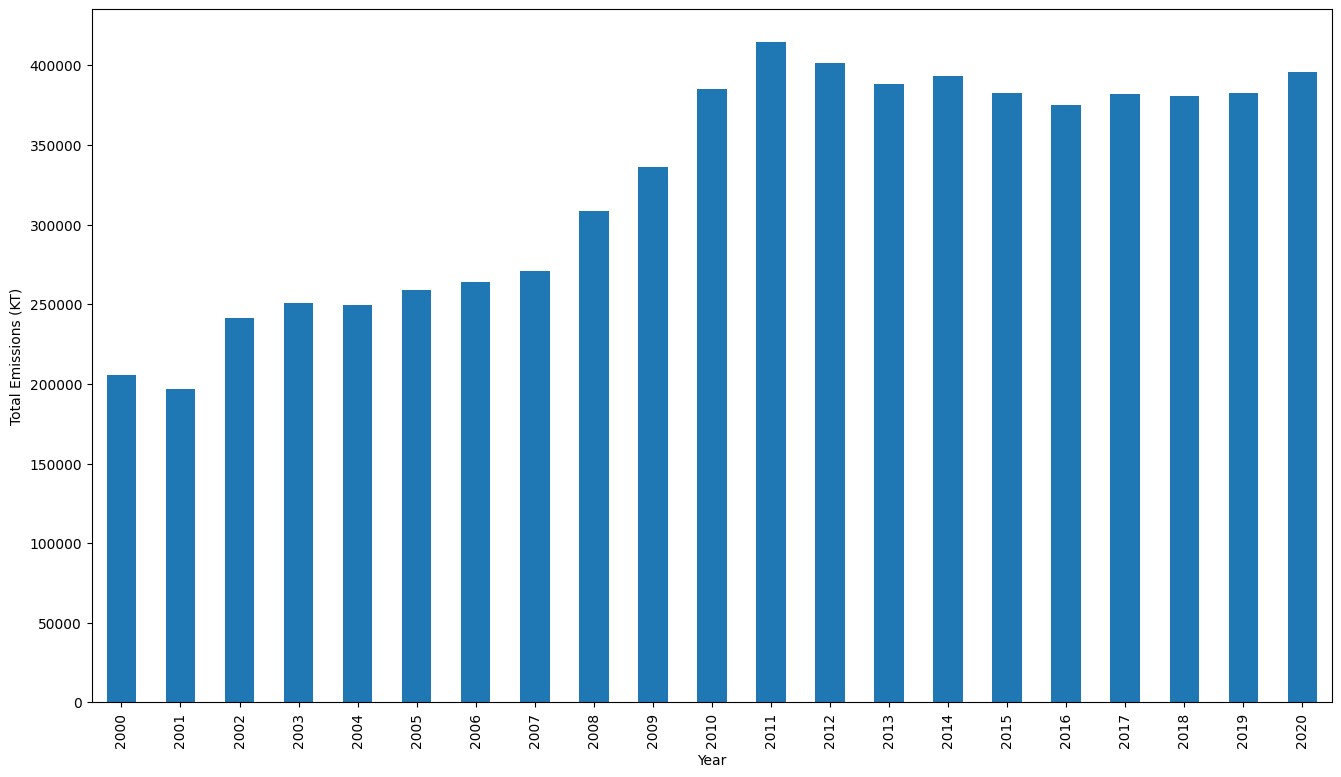

In [31]:
plt.figure(figsize=(16,9))
afghanistan_data.groupby(['Year'])['Total_Emissions_KT'].sum().plot.bar()
plt.xlabel('Year')
plt.ylabel('Total Emissions (KT)')

### Functional approach to data wrangling for scaling

In [32]:
def clean_data(dataset: pd.DataFrame):
    """
    Drops na values and duplicates from the data
    """
    data = dataset.copy()
    data = data.dropna()
    data = data.drop_duplicates()
    
    return data

In [33]:
def stack_data_by_year(data: pd.DataFrame):
    """
    Stacks the individual years columns in one column to simplify the data
    """
    stacked_yr_data = pd.melt(data, 
                   id_vars=['Area', 'Item', 'Element'],
                   value_vars=data.iloc[:,4:],
                   var_name='Year',
                   value_name='Total_Emissions_KT'
    )
    
    return stacked_yr_data

In [34]:
def get_country_data(data: pd.DataFrame, country_name: str):
    """
    Gets the data for a particular country
    """
    country_data = data[data['Area']==country_name]
    
    return country_data 

In [35]:
def remove_element_subcats(data: pd.DataFrame):
    """
    Removes subcategories in the 'Elements' column, leaving only sums of sub-categories
    """ 
    data_no_emission_reps = data[~data['Element'].str.\
                                contains('|'.join(['Direct', 'Indirect', 'from']))]
    
    return data_no_emission_reps

In [36]:
def split_element(data: pd.DataFrame):
    """
    Splits the 'Element' column into new columns for each of the unique values in the 
    'Element' column and sets the DateTime formatted 'Year' column as index
    """
    # Split 'Element' into columns
    data['Total_Emissions_KT'] = pd.to_numeric(data['Total_Emissions_KT'], errors='coerce')
    split_element_data = data.pivot_table(index=['Year'], 
                                          columns='Element', 
                                          values='Total_Emissions_KT',
                                          aggfunc='sum').reset_index()
    
    # Merge CO2 data
    split_element_data["Emissions (CO2)"] = split_element_data["Emissions (CO2)"] +\
                                            split_element_data["Emissions (CO2eq) (AR5)"]
    split_element_data = split_element_data.drop(["Emissions (CO2eq) (AR5)"], axis=1)
    
    # convert the string in 'Year' column to DateTime format and set it as the index
    split_element_data['Year'] = pd.to_datetime(split_element_data['Year'], format='%Y')
    split_element_data.set_index(split_element_data['Year'].dt.year, inplace=True)
    split_element_data.drop(columns='Year', inplace=True)
    split_element_data.index.name=None
    split_element_data.columns.name=None
    split_element_data.index = pd.to_datetime(split_element_data.index, format='%Y')
    
    return split_element_data

In [37]:
# Get country data from dataset

In [38]:
def clean_country_data(country: str, dataset: pd.DataFrame):
    """
    Stacks all the hepler functions to get clean and formatted data for one country
    """
    
    cleaned_data = clean_data(dataset)
    stacked_data = stack_data_by_year(cleaned_data)
    afghan_data = get_country_data(stacked_data, country)
    cleaned_elements = remove_element_subcats(afghan_data)
    formatted_data = split_element(cleaned_elements)
    
    return formatted_data

In [39]:
honduras_data = clean_country_data('Afghanistan', dataset)
honduras_data

,Emissions (CH4),Emissions (CO2),Emissions (N2O)
2000-01-01,2892.7385,94944.1081,101.5398
2001-01-01,2493.6854,100817.5121,89.2327
2002-01-01,3106.4169,123918.9241,103.8473
2003-01-01,3217.9286,128879.4615,107.8350
2004-01-01,3224.1881,127253.8104,107.0277
2005-01-01,3308.7452,133601.1409,111.6399
2006-01-01,3386.0303,137192.0525,106.6596
2007-01-01,3470.3567,142655.1283,104.4935
2008-01-01,3820.8233,167643.5348,113.1468
2009-01-01,3922.1214,190275.9015,121.7655


### Statistical Tests

Visualize the data

In [40]:
vis_data = honduras_data

In [41]:
# Visualize the data
def visualize_data(vis_data: pd.DataFrame):
    """
    Visualizes the cleaned data on a column by column basis
    """
    print("Visualize Data:")
    print("="*15)
    fig, axes = plt.subplots(nrows=3, ncols=1, dpi=240, figsize=(16,11))

    for i, ax in enumerate(axes.flatten()):
        data = vis_data[vis_data.columns[i]]
        ax.plot(data, color='green', linewidth=3)

        # Formatting
        ax.set_title(vis_data.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines['top'].set_alpha(0)
        ax.tick_params(labelsize=10)

    plt.tight_layout();

Visualize Data:


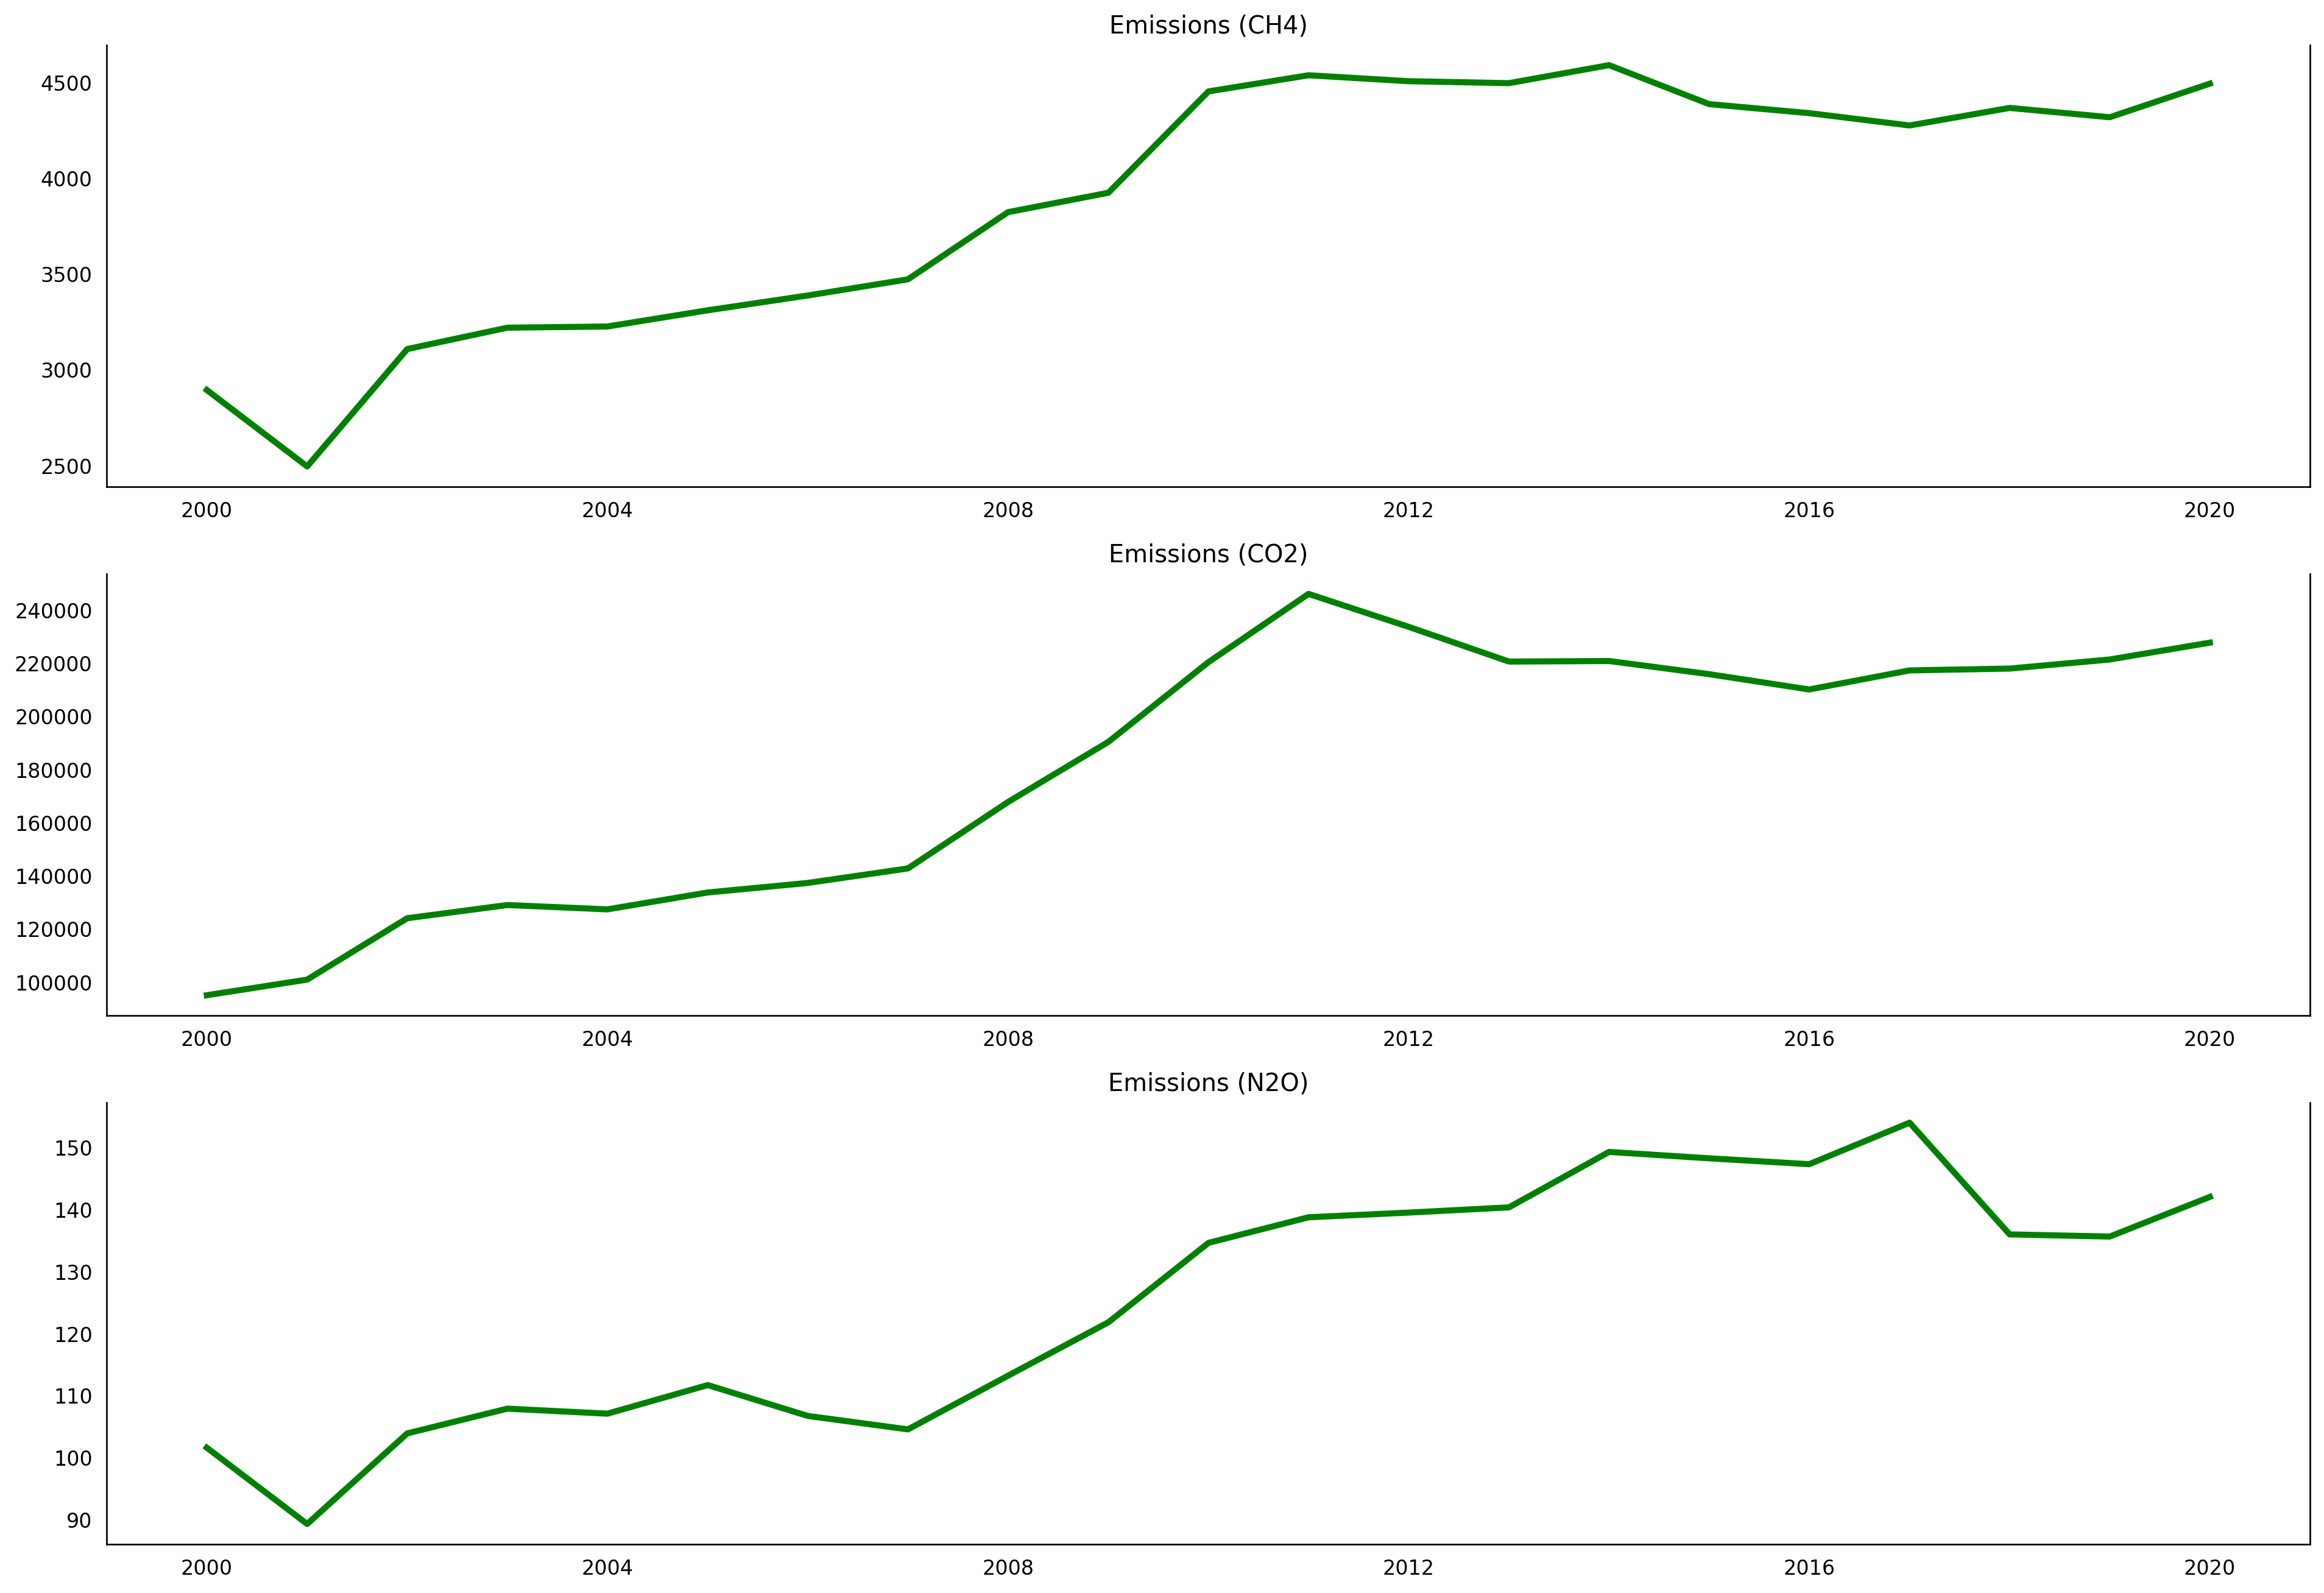

In [42]:
visualize_data(vis_data)

- Check the Stationarity of the data using the Augumented Dickey-Fuller Test

In [43]:
def test_statonary(ts_data, title, difference=1):
    """
    This function takes a univariate time-series data, performs the
    Augumented Dickey-Fuller test and plots the original data
    as well as an overlay of the rolling mean and standard deviation
    """
    
    rolmean = ts_data.rolling(2).mean()
    rolstd = ts_data.rolling(2).std()
    
    plt.figure(figsize=(16,9))
    plt.grid('moth')
    plt.plot(ts_data, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std. Dev')
    plt.title(title)
    plt.legend()
    
    print("_ "*21)
    print(f"Augumented Dickey-Fuller Test: {title}\n")
    
    dft = adfuller(ts_data.diff(difference).dropna()) # Differencing appiled here: 'ts_data.diff(1)'
    dft_output = pd.Series(dft[0:4], index=['Test Statistic', 'p-value', 'No. of lags Used',
                                            'No. of obsv used'])
    
    for key, value in dft[4].items():
        dft_output['Confidence Interval (%s)'%key] = value
    print(dft_output)
    print("_ "*21)

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Augumented Dickey-Fuller Test: Emissions (CH4)

Test Statistic               -2.476969
p-value                       0.121179
No. of lags Used              8.000000
No. of obsv used             11.000000
Confidence Interval (1%)     -4.223238
Confidence Interval (5%)     -3.189369
Confidence Interval (10%)    -2.729839
dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Augumented Dickey-Fuller Test: Emissions (CO2)

Test Statistic               -2.435084
p-value                       0.132078
No. of lags Used              0.000000
No. of obsv used             19.000000
Confidence Interval (1%)     -3.832603
Confidence Interval (5%)     -3.031227
Confidence Interval (10%)    -2.655520
dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Augumented Dickey-Fuller Test: Emissions (N2O)

Test Statistic               -5.101202
p-value                   

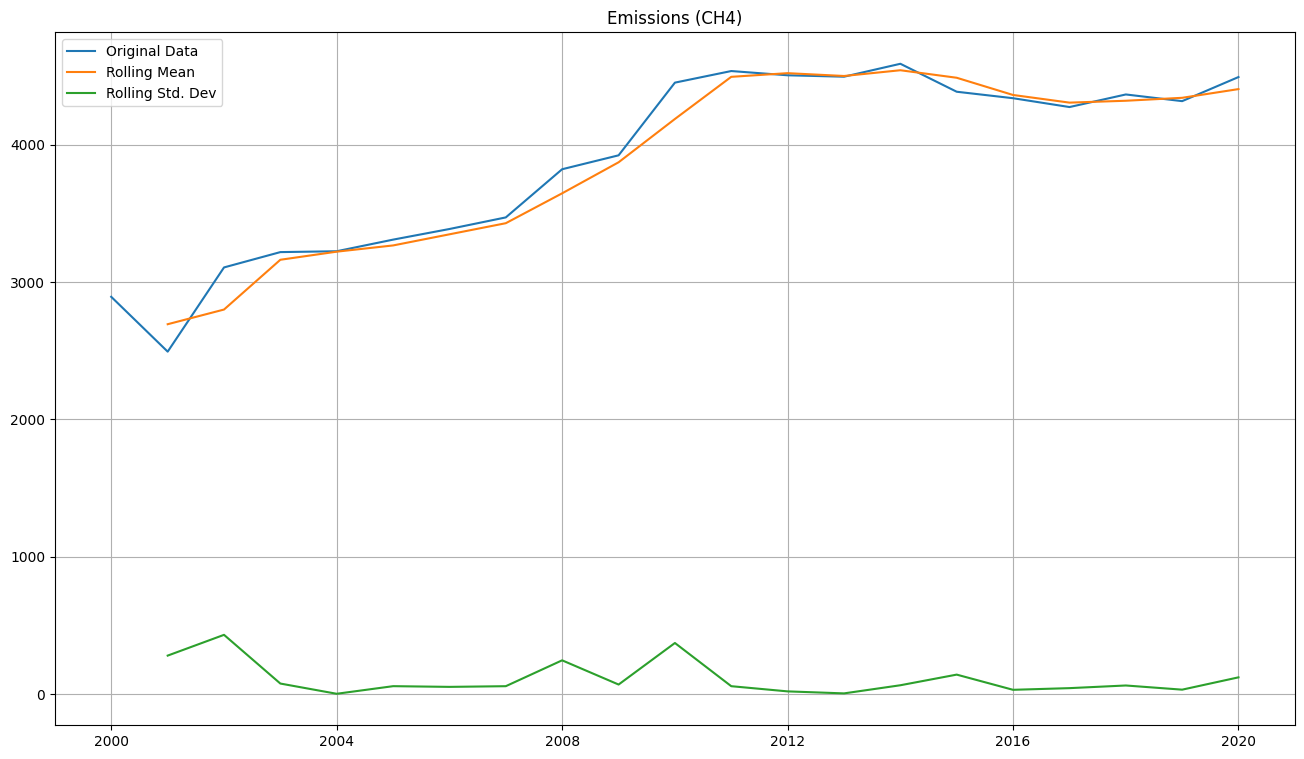

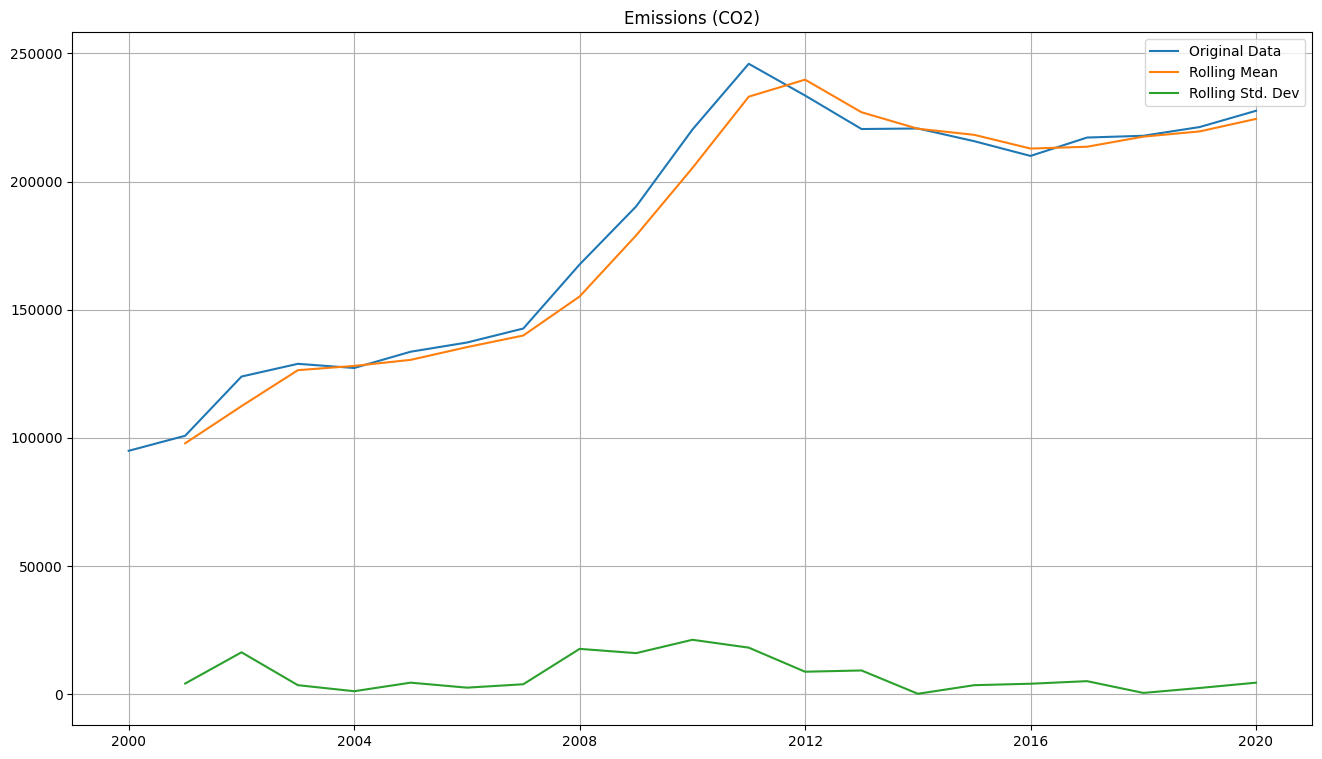

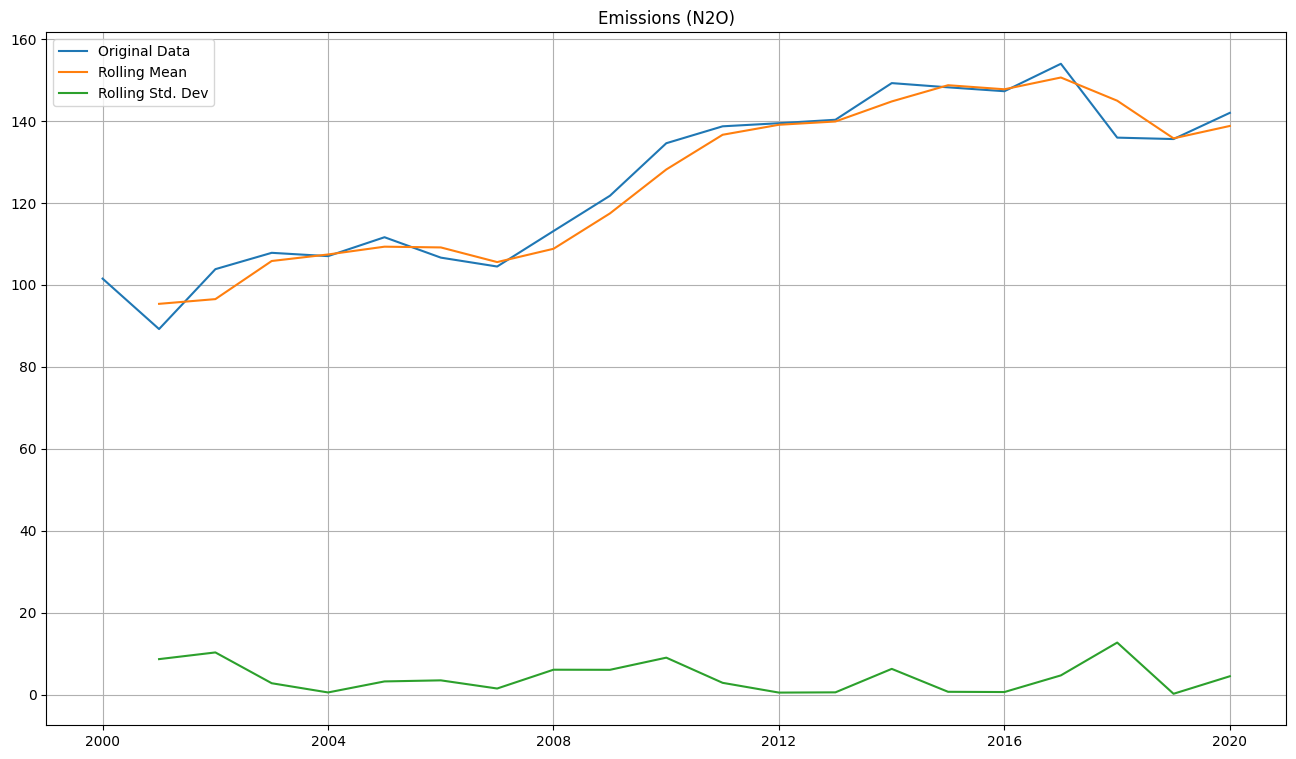

In [44]:
# Loop through the columns in the dataset and run the stationarity test
for i in vis_data.columns:
    test_statonary(vis_data[i],i)

From the ADF results, we can see that the data points become stationary with one differencing


- Carry out Granger Causality Test

In [ ]:
def granger_test(vis_data: pd.DataFrame):
    """
    Loops through the column pair combinations in the dataset and runs
    Granger test for 1 and 2 time lags.
    
    Displays the results and returns the causality matrices for 
    1 and 2 time lags
    """
    # Initialize dataframe to hold
    causality_matrix_1TL = pd.DataFrame(index=vis_data.columns, columns= vis_data.columns)
    causality_matrix_1TL.index.name=None

    causality_matrix_2TL = pd.DataFrame(index=vis_data.columns, columns= vis_data.columns)
    causality_matrix_2TL.index.name=None
    
    for i in vis_data.columns:
        for j in vis_data.columns:
            if i!=j:
                print(f"{i} causes {j}?\n", "_ "*11)
                granger = grangercausalitytests(vis_data[[i,j]],2)
                print("="*30,"\n")
                causality_matrix_1TL[i][j] = granger[1][0]['ssr_ftest'][1]
                causality_matrix_2TL[i][j] = granger[2][0]['ssr_ftest'][1]
    
    return causality_matrix_1TL, causality_matrix_2TL

In [46]:
causality_matrix_1TL, causality_matrix_2TL = granger_test(vis_data)

Emissions (CH4) causes Emissions (CO2)?
 _ _ _ _ _ _ _ _ _ _ _ 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3764  , p=0.0101  , df_denom=17, df_num=1
ssr based chi2 test:   chi2=9.8546  , p=0.0017  , df=1
likelihood ratio test: chi2=8.0121  , p=0.0046  , df=1
parameter F test:         F=8.3764  , p=0.0101  , df_denom=17, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0098  , p=0.0818  , df_denom=14, df_num=2
ssr based chi2 test:   chi2=8.1696  , p=0.0168  , df=2
likelihood ratio test: chi2=6.7955  , p=0.0334  , df=2
parameter F test:         F=3.0098  , p=0.0818  , df_denom=14, df_num=2

Emissions (CH4) causes Emissions (N2O)?
 _ _ _ _ _ _ _ _ _ _ _ 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3846  , p=0.2555  , df_denom=17, df_num=1
ssr based chi2 test:   chi2=1.6290  , p=0.2018  , df=1
likelihood ratio test: chi2=1.5661  , p=0.2108  , df=1
parameter F test:         F=1.3846  , p=0.2

In [47]:
causality_matrix_1TL

,Emissions (CH4),Emissions (CO2),Emissions (N2O)
Emissions (CH4),NaN,0.82443,0.019627
Emissions (CO2),0.010086,NaN,0.006394
Emissions (N2O),0.255525,0.098598,NaN


In [48]:
causality_matrix_2TL

,Emissions (CH4),Emissions (CO2),Emissions (N2O)
Emissions (CH4),NaN,0.456192,0.058417
Emissions (CO2),0.081789,NaN,0.087296
Emissions (N2O),0.162462,0.659087,NaN


From the causality matrices, it can be observed that the causality relationships largely fade after one time lag between the features in the dataset

### Train Test Split

In [49]:
def train_test_split(data: pd.DataFrame, test_samples: int):
    """
    Splits the data into train and test based on the specified number
    of test samples
    """
    train_df = data[:-test_samples]
    test_df = data[-test_samples:]
    print("train_df: ",train_df.shape, "test_df: ",test_df.shape)
    return train_df, test_df

In [50]:
train_df, test_df = train_test_split(vis_data, test_samples=3)

train_df:  (18, 3) test_df:  (3, 3)


### Build Model

##### Hyperparameter Tuning

Use brute force to check through combination of p and d values which yields best RMSE

In [51]:
def varmax_model(train_df, varmax_order):
    """
    Fits a VARMAX model with the specified order, makes predictions and
    checks the RMSE with respect to test set specified in 'get_best_model'
    function
    """
    # train the model
    var_model = VARMAX(train_df, order=varmax_order, enforce_stationarity=True)
    model_fit = var_model.fit(disp=False)
    
    # set forecast range
    start = dt.datetime(year=2018, month=1, day=1)
    end = dt.datetime(year=2020, month=1, day=1)

    # Make forecasts
    predict = model_fit.get_prediction(start=start, end=end)
    predictions = predict.predicted_mean
    
    RMSE = {'Emissions (CH4)':0, 'Emissions (CO2)':0, 'Emissions (N2O)':0}
    for i,j in zip(predictions.columns, test_df.columns):
        rmse = np.sqrt(mean_squared_error(predictions[i], test_df[j]))
        RMSE[j] = rmse
    
    return RMSE

In [54]:
def get_best_model(train, test, max_pd_val):
    """
    Generates sequences of p,d values for model training, trains multiple
    models using 'varmax_model' function and prints the best
    model configuration and RMSE score.
    
    Returns best model RMSE score and best config
    """
    # initialize p and d value for model training
    p_d_vals = [list(range(0,max_pd_val+1)), list(range(0,max_pd_val+1))]
    p_d_vals = list(itertools.product(*p_d_vals))[1:]
    
    # intialize 'best_score' and 'best_cfg'
    best_score = {'Emissions (CH4)':float('inf'), 
                  'Emissions (CO2)':float('inf'), 
                  'Emissions (N2O)':float('inf')}
    best_cfg = None
    
    for i in p_d_vals:
        varmax_order = (i[0],i[1])
        RMSE = varmax_model(train_df, varmax_order)

        try:
            if  RMSE['Emissions (CH4)']<best_score['Emissions (CH4)'] and\
                RMSE['Emissions (CO2)']<best_score['Emissions (CO2)'] and\
                RMSE['Emissions (N2O)']<best_score['Emissions (N2O)']:
                best_score  = RMSE
                best_cfg = varmax_order
                print(RMSE, order)
        except:
            continue
                
    print("best rmse: {} \nbest_cfg: {}".format(best_score, best_cfg))
    return best_score, best_cfg

In [55]:
best_model = get_best_model(train_df, test_df, max_pd_val=3)

best rmse: {'Emissions (CH4)': 524.7533635779065, 'Emissions (CO2)': 41303.67228007744, 'Emissions (N2O)': 14.502263686697994} 
best_cfg: (0, 1)


Use built-in parameter checker

In [56]:
# check for best model parameters 
# Apply one differencing since it showed positive effect in ADF test
def inbuilt_checker(train_df: pd.DataFrame, difference=1):
    """
    Uses the built-in parameter checking system of the VAR module
    to display the model parameters with respect to different time lags.
    
    Uses * to mark the best parameter values for each time lag.
    
    Pick best AR p value by visually inspecting to see time lag with
    the most '*'s
    """
    model = VAR(train_df.diff(difference).dropna())
    sorted_order = model.select_order()
    return sorted_order.summary()

In [57]:
inbuilt_checker(train_df, difference=1)

,AIC,BIC,FPE,HQIC
0,31.51*,31.65*,4.854e+13*,31.50*
1,31.76,32.31,6.525e+13,31.71
2,31.95,32.91,1.014e+14,31.87
3,31.66,33.03,1.679e+14,31.54


##### Train Model

The model will be initialized with 2 time lags since that vaule has the best set of statistical measures with brute force and the in-built checker

In [58]:
# Fit the model
def train_model(train_df: pd.DataFrame, order: tuple):
    """
    Fits a VARMAX model based on specified training data and p,d order
    """
    var_model = VARMAX(train_df, order=(order[0],order[1]), enforce_stationarity=True )
    model_fit = var_model.fit(disp=False)
    print(model_fit.summary())
    return model_fit

In [59]:
model_fit = train_model(train_df, (2,0))

                                               Statespace Model Results                                              
Dep. Variable:     ['Emissions (CH4)', 'Emissions (CO2)', 'Emissions (N2O)']   No. Observations:                   18
Model:                                                                VAR(2)   Log Likelihood                -345.629
                                                                 + intercept   AIC                            745.257
Date:                                                       Thu, 25 May 2023   BIC                            769.297
Time:                                                               12:17:52   HQIC                           748.572
Sample:                                                           01-01-2000                                         
                                                                - 01-01-2017                                         
Covariance Type:                                        

### Make Predictions & Evaluate Model

In [60]:
def predict_data(model, start_year: int, end_year: int):
    """
    Makes predictions using specified model and period from start_year 
    to end_year and returns the predictions as a DataFrame
    """
    # set date range to forecast
    start = dt.datetime(year=start_year, month=1, day=1)
    end = dt.datetime(year=end_year, month=1, day=1)

    # Make forecasts
    predict = model.get_prediction(start=start, end=end)
    predictions = predict.predicted_mean
    
    # Format dataframe
    predictions.columns=['Emissions (CH4)_predicted', 
                         'Emissions (CO2)_predicted', 
                         'Emissions (N2O)_predicted']
    
    return predictions

In [61]:
predictions = predict_data(model_fit, 2018, 2020)
predictions 

,Emissions (CH4)_predicted,Emissions (CO2)_predicted,Emissions (N2O)_predicted
2018-01-01,4082.023196,208449.166784,151.472805
2019-01-01,3790.355095,185782.908603,146.824156
2020-01-01,3458.804990,153744.687432,140.170598


Visual Comparison

In [62]:
def visual_eval(test_df: pd.DataFrame, predictions: pd.DataFrame, vis_data: pd.DataFrame):
    """
    Generates visulization of an overlay of training, test and predicted data for each
    feature
    """
    # concatenate test_df and predictions
    test_n_predictions = pd.concat([test_df, predictions], axis=1)
    
    # plot CO2 data (because CO2 values are very high compared to the other Elements)
    plt.figure(figsize=(16,9))
    plt.title('Emissions (CO2)')
    plt.plot(test_n_predictions['Emissions (CO2)'], label= 'Test') 
    plt.plot(test_n_predictions['Emissions (CO2)_predicted'], label = 'Predicted') 
    plt.plot(vis_data['Emissions (CO2)']['2010-01-01':test_df.index[-len(test_df)]], label= 'Train')
    plt.legend()
    
    plt.figure(figsize=(16,9))
    plt.title('Emissions (CH4)')
    plt.plot(test_n_predictions['Emissions (CH4)'], label= 'Test') 
    plt.plot(test_n_predictions['Emissions (CH4)_predicted'], label = 'Predicted') 
    plt.plot(vis_data['Emissions (CH4)']['2010-01-01':test_df.index[-len(test_df)]], label= 'Train')
    plt.legend()
    
    plt.figure(figsize=(16,9))
    plt.title('Emissions (N2O)')    
    plt.plot(test_n_predictions['Emissions (N2O)'], label= 'Test') 
    plt.plot(test_n_predictions['Emissions (N2O)_predicted'], label = 'Predicted') 
    plt.plot(vis_data['Emissions (N2O)']['2010-01-01':test_df.index[-len(test_df)]], label= 'Train')
    plt.legend()


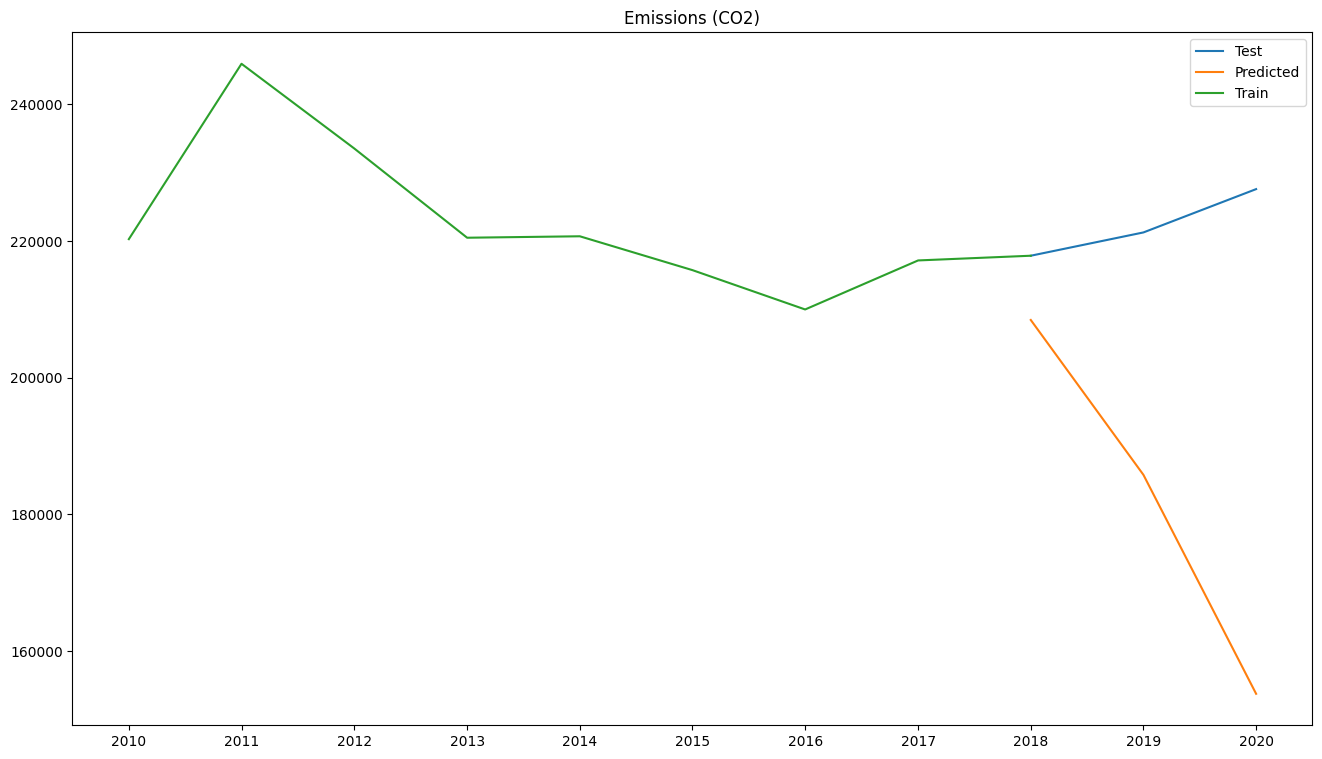

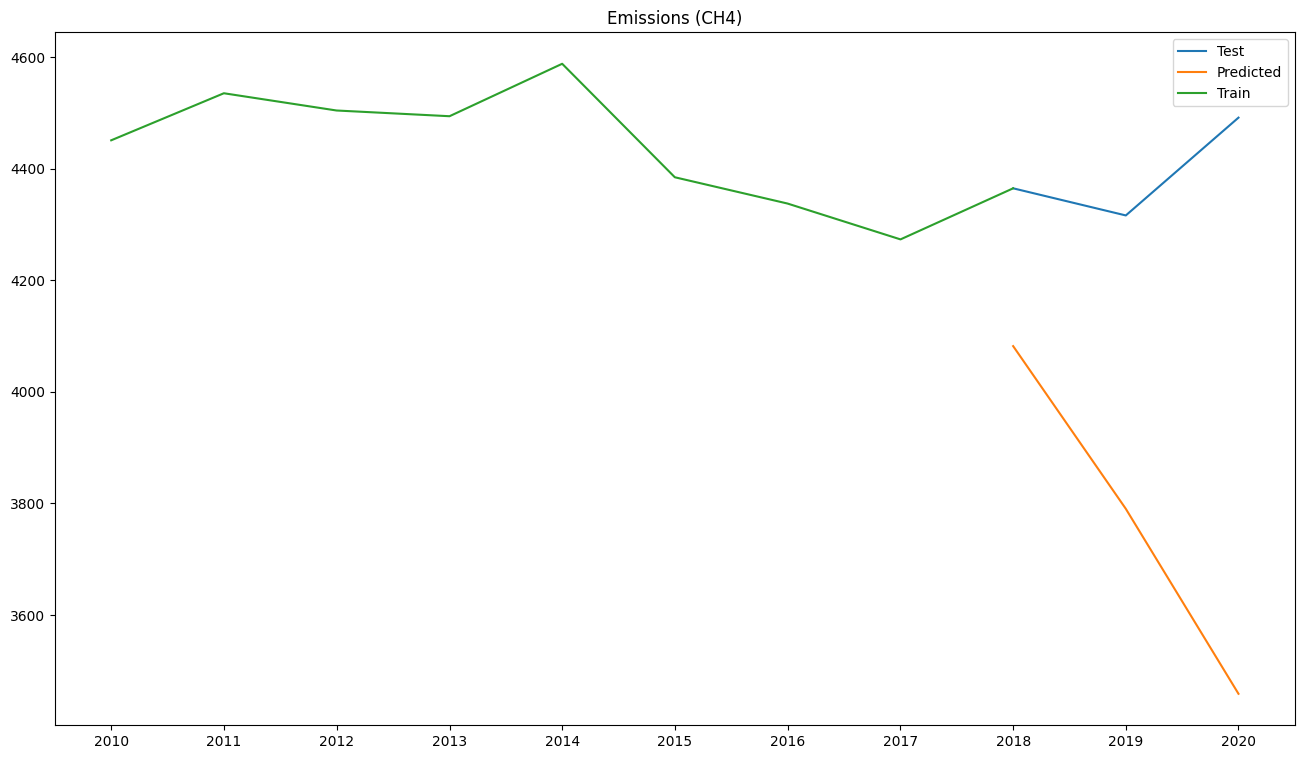

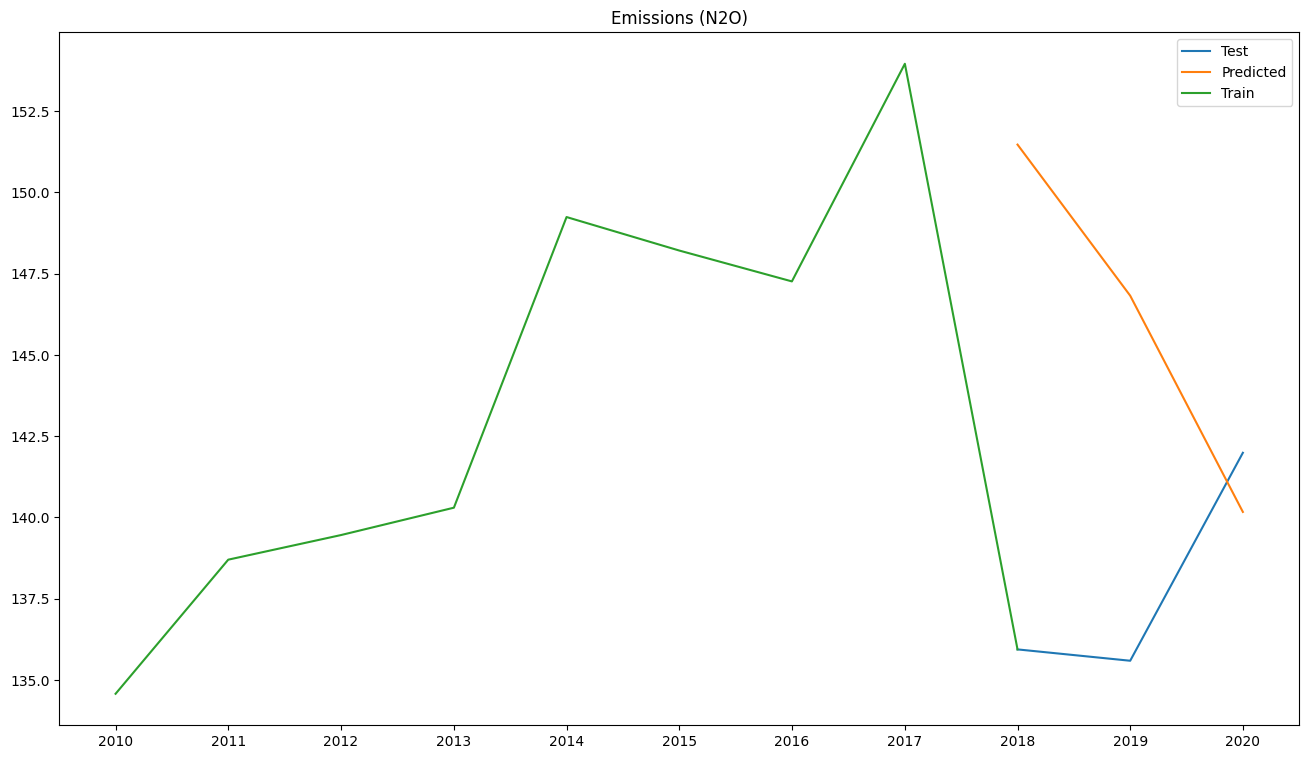

In [63]:
visual_eval(test_df, predictions, vis_data)

Statistical Evaluation

In [64]:
def stat_eval(test_df: pd.DataFrame, predictions: pd.DataFrame):
    """
    Carries out statistical evaluation of model based on test data and 
    prediction. 
    
    Prints and returns a summary dictionary
    """
    # statistical evaluations
    RMSE = {'Emissions (CH4)':0, 'Emissions (CO2)':0, 'Emissions (N2O)':0}
    
    print("="*5,"Statistical Eval","="*5,"\n")
    for i,j in zip(predictions.columns, test_df.columns):
        rmse = math.sqrt(mean_squared_error(predictions[i], test_df[j]))
        RMSE[j] = rmse
        print(f"Mean val {j}: {round(mean(test_df[j]), 4)} -- RMSE: {round(rmse, 4)}",
             f"-- RMSE < 10% Mean: ", round(rmse, 4)< round(mean(test_df[j]), 4)/10)
                    
    return RMSE

In [65]:
RMSE = stat_eval(test_df, predictions)

===== Statistical Eval ===== 

Mean val Emissions (CH4): 4390.9135 -- RMSE: 688.7699 -- RMSE < 10% Mean:  False
Mean val Emissions (CO2): 222237.3967 -- RMSE: 47615.3215 -- RMSE < 10% Mean:  False
Mean val Emissions (N2O): 137.8408 -- RMSE: 11.1165 -- RMSE < 10% Mean:  True


It can be observed that for most of the targets the RMSE is <10% of the mean, indicating good predictive power

In [66]:
RMSE

{'Emissions (CH4)': 688.7699397819373,
 'Emissions (CO2)': 47615.32154267982,
 'Emissions (N2O)': 11.116508740704818}

# Pipelines

### Data Pipeline

In [67]:
def clean_country_data(country: str, dataset: pd.DataFrame):
    """
    Stacks all the hepler functions to get clean and formatted data for one country
    """
    
    cleaned_data = clean_data(dataset)
    stacked_data = stack_data_by_year(cleaned_data)
    afghan_data = get_country_data(stacked_data, country)
    cleaned_elements = remove_element_subcats(afghan_data)
    formatted_data = split_element(cleaned_elements)
    
    return formatted_data

### Statistical Tests Pipeline

In [68]:
def stat_tests(vis_data):
    """
    Takes cleaned data as input and calls all the functions needed
    for statistical tests sequentially and prints the results
    """

    # visualize the data
    print("Data Visualization")
    print("="*30)
    visualize_data(vis_data) 
    
    # check for stationarity
    print("\nStationarity Test")
    print("="*30)
    for i in vis_data.columns:
        test_statonary(vis_data[i],i)
        
    # carry out granger test 
    print("\nGranger Causality Test")
    print("="*30)
    causality_matrix_1TL, causality_matrix_2TL = granger_test(vis_data)
    print("Causality Matrix (1 Time Lag):\n",causality_matrix_1TL)
    print("Causality Matrix (2 Time Lags):\n",causality_matrix_2TL)

Data Visualization
Visualize Data:

Stationarity Test
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Augumented Dickey-Fuller Test: Emissions (CH4)

Test Statistic               -2.476969
p-value                       0.121179
No. of lags Used              8.000000
No. of obsv used             11.000000
Confidence Interval (1%)     -4.223238
Confidence Interval (5%)     -3.189369
Confidence Interval (10%)    -2.729839
dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Augumented Dickey-Fuller Test: Emissions (CO2)

Test Statistic               -2.435084
p-value                       0.132078
No. of lags Used              0.000000
No. of obsv used             19.000000
Confidence Interval (1%)     -3.832603
Confidence Interval (5%)     -3.031227
Confidence Interval (10%)    -2.655520
dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Augumented Dickey-Fuller Test: Emissions (N2O)

Test Statis

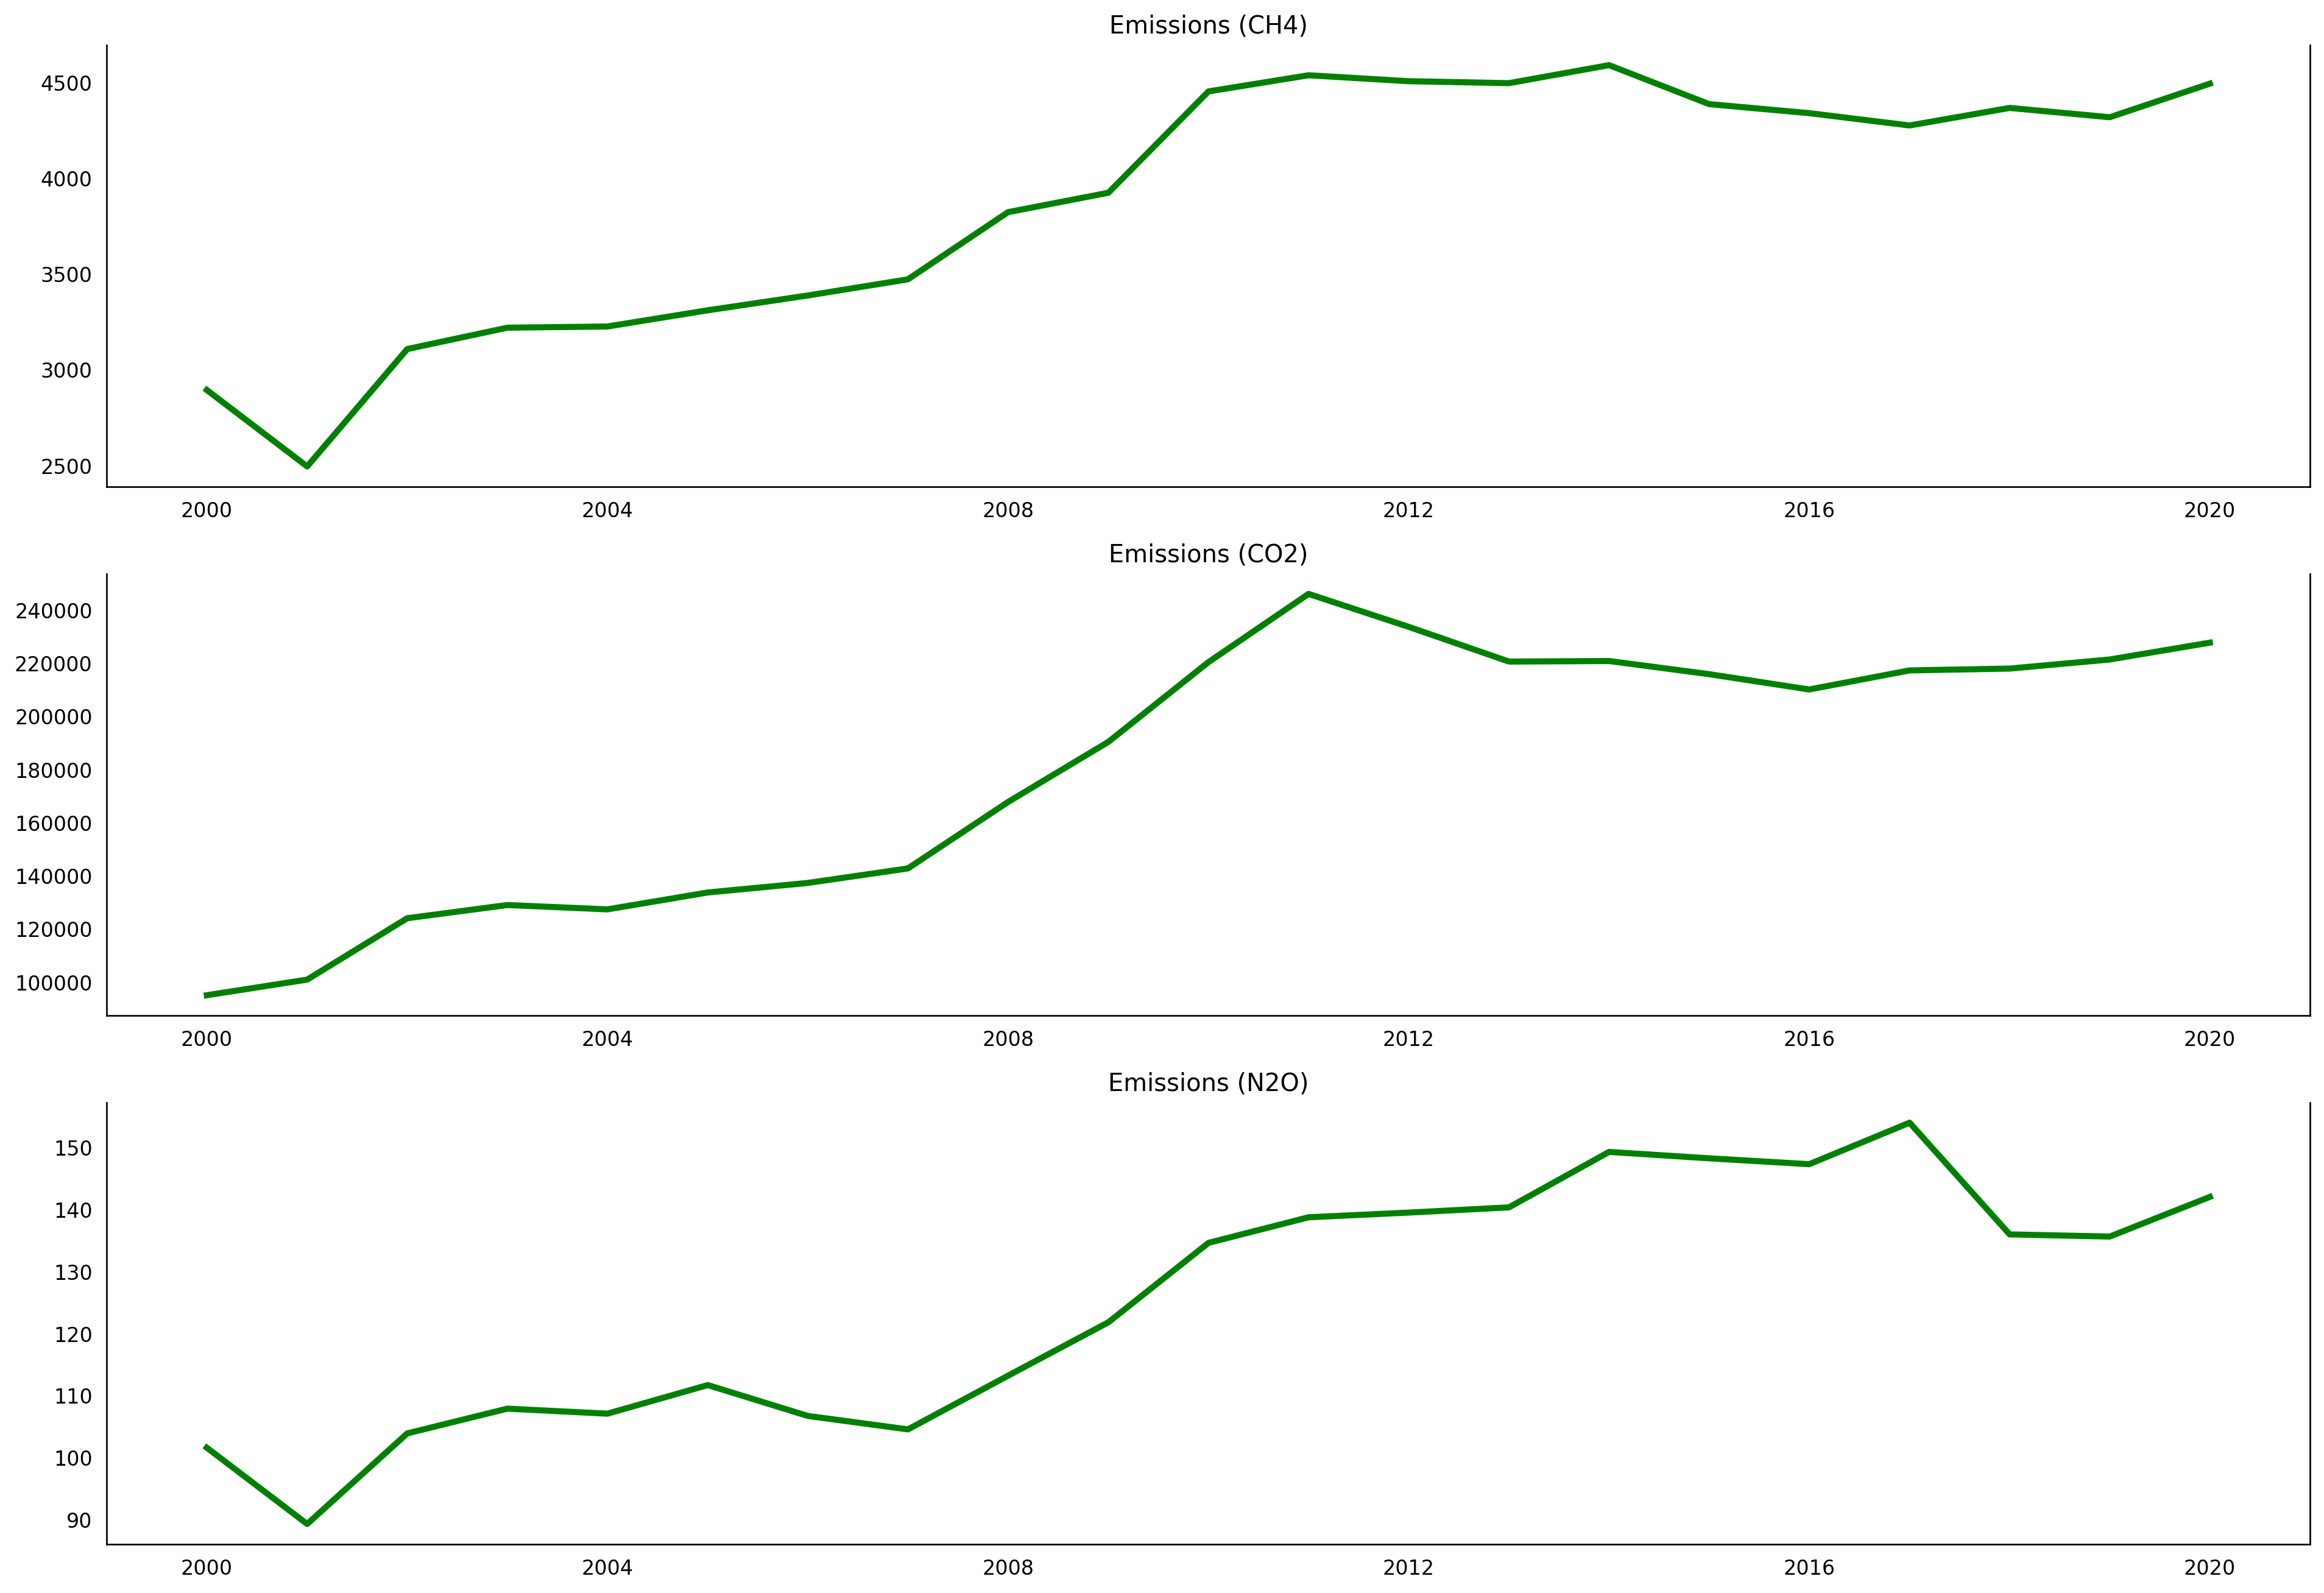

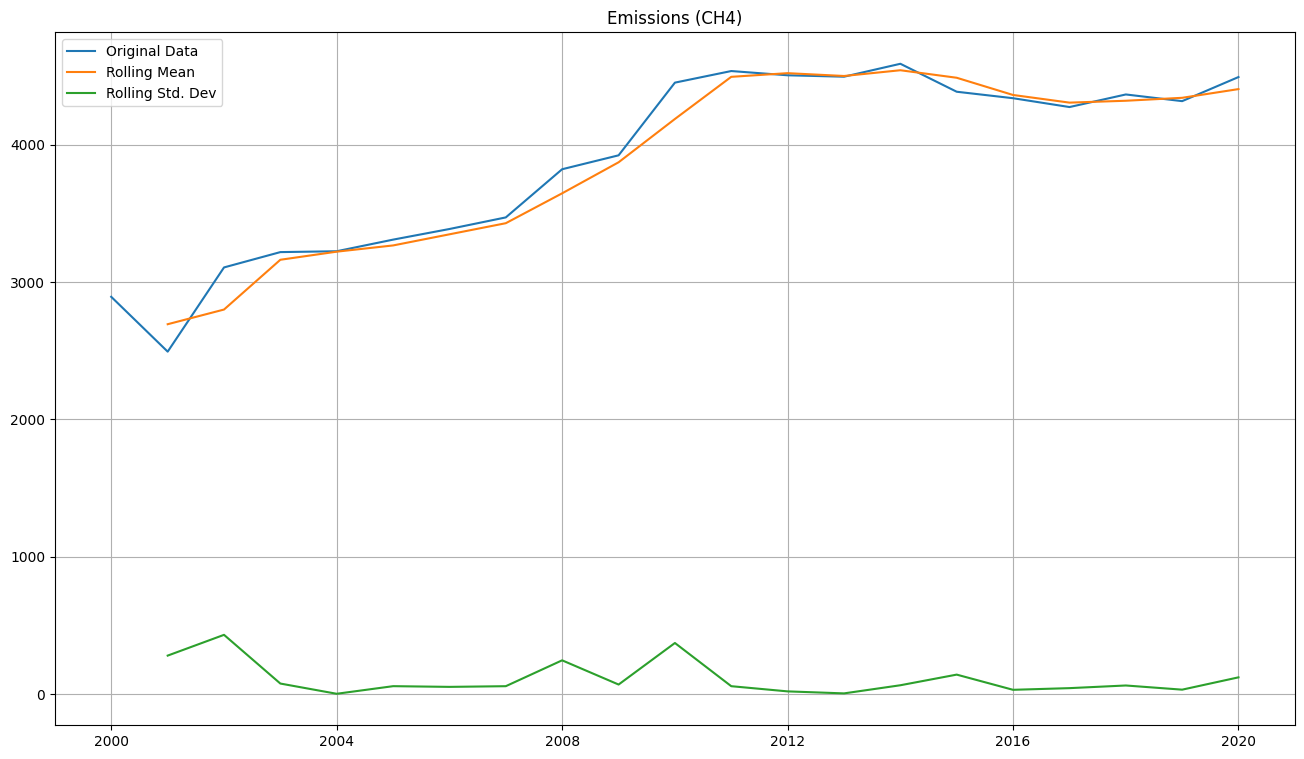

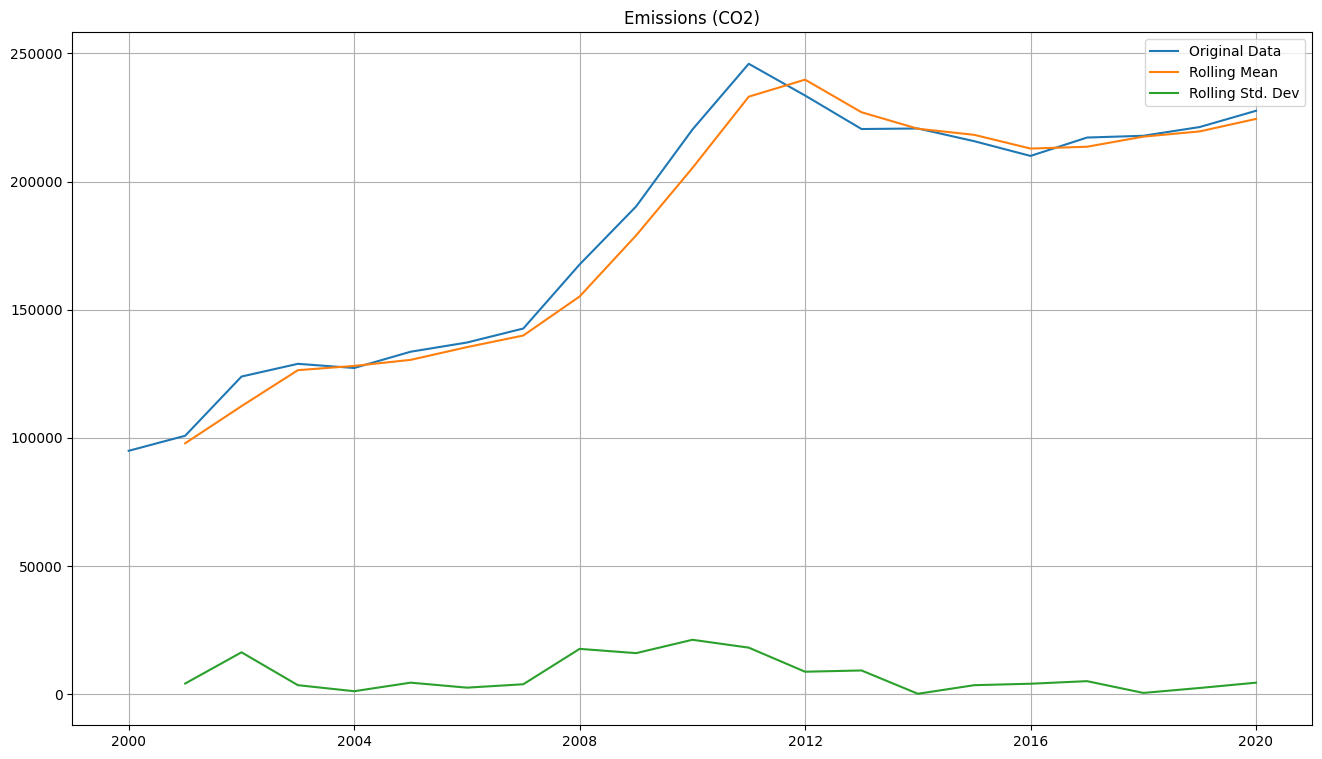

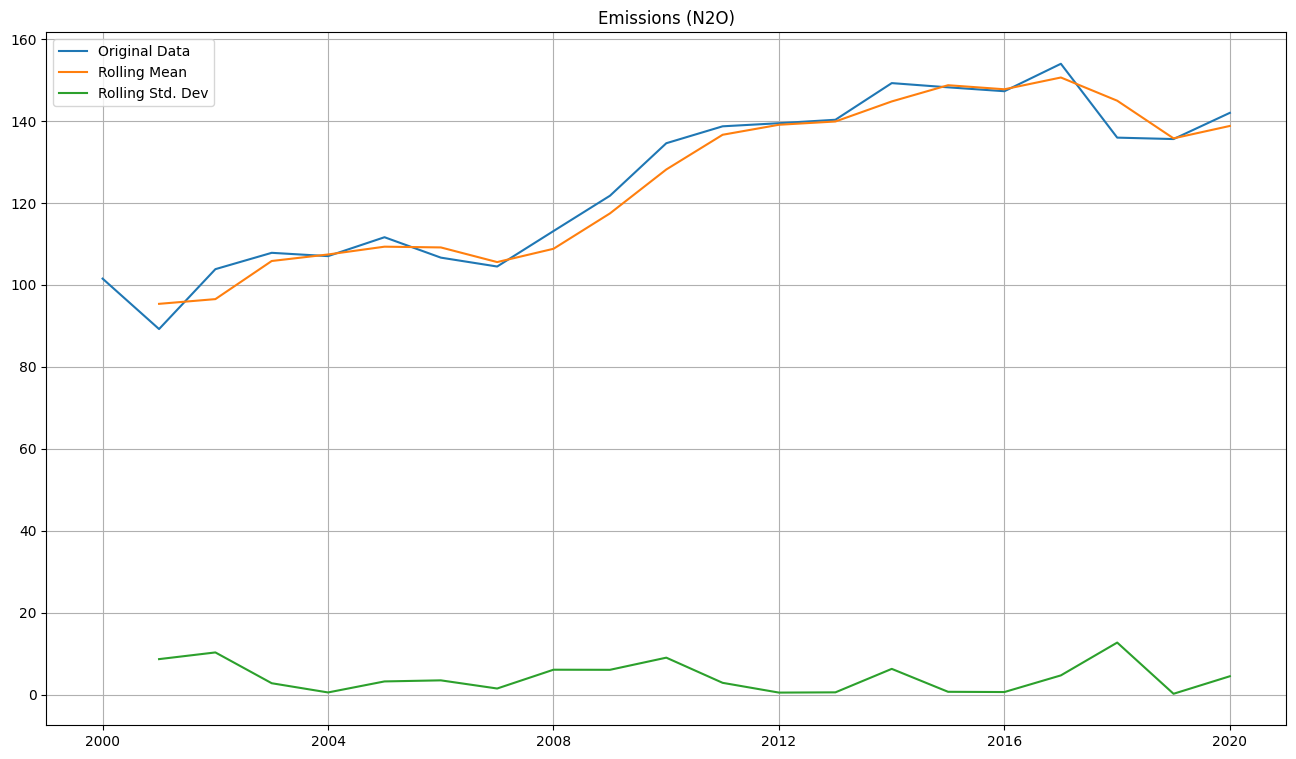

In [69]:
stat_tests(vis_data)

### Tuning Pipeline

In [70]:
def tune_model(vis_data, test_samples=3, max_pd_val=2):
    """
    Takes clean data, number of test sets required and max value for p and p.
    
    Splits data into train and test sets, calls functions for brute force 
    hyperparameter tuning as well as built-in VAR tuner and prints results
    """
    # train-test split
    train_df, test_df = train_test_split(vis_data, test_samples)
    
    # hyperparameter tuning
    print("\nHyperparameter tuning:")
    print("\nBrute force tuning:")
    print("="*15)
    print(get_best_model(train_df, test_df, max_pd_val))
    
    print("\nIn-built Checker:")
    print("="*15)
    print(inbuilt_checker(train_df, difference=1))

In [71]:
tune_model(vis_data, test_samples=3, max_pd_val=2)

train_df:  (18, 3) test_df:  (3, 3)

Hyperparameter tuning:

Brute force tuning:
best rmse: {'Emissions (CH4)': 524.7533635779065, 'Emissions (CO2)': 41303.67228007744, 'Emissions (N2O)': 14.502263686697994} 
best_cfg: (0, 1)
({'Emissions (CH4)': 524.7533635779065, 'Emissions (CO2)': 41303.67228007744, 'Emissions (N2O)': 14.502263686697994}, (0, 1))

In-built Checker:
 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      31.51*      31.65*  4.854e+13*      31.50*
1       31.76       32.31   6.525e+13       31.71
2       31.95       32.91   1.014e+14       31.87
3       31.66       33.03   1.679e+14       31.54
-------------------------------------------------


### Model Pipeline

In [72]:
def model_training(vis_data, test_samples=3, varmax_order: tuple=(2,0)):
    """
    Takes clean data, number of test samples reqired and tuple of p,d values 
    and returns fit model.
    
    Splits the clean data into train and test set, fits VARMAX model on train
    set with specified p,d values, makes predictions corresponding to number 
    of test samples and performs visual and statistical evaluation of the model.
    
    Prints the model statistical evaluation summary and returns the model.
    """
    # train-test split
    train_df, test_df = train_test_split(vis_data, test_samples)
    
    # train model
    print("\nModel Info:")
    print("="*15)
    model_fit = train_model(train_df, (varmax_order[0],varmax_order[1]))
    
    # make predictions
    predictions = predict_data(model_fit, 2020-test_samples+1, 2020)
    print("\nPredictions:")
    print("="*15)
    print(predictions)
    
    # model evaluation
    print("\nVisual Evaluation:")
    print("="*15)
    visual_eval(test_df, predictions, vis_data)
    
    RMSE = stat_eval(test_df, predictions)
    
    print(RMSE)
    
    
    return model_fit

train_df:  (18, 3) test_df:  (3, 3)

Model Info:
                                               Statespace Model Results                                              
Dep. Variable:     ['Emissions (CH4)', 'Emissions (CO2)', 'Emissions (N2O)']   No. Observations:                   18
Model:                                                                VAR(2)   Log Likelihood                -345.629
                                                                 + intercept   AIC                            745.257
Date:                                                       Thu, 25 May 2023   BIC                            769.297
Time:                                                               12:19:38   HQIC                           748.572
Sample:                                                           01-01-2000                                         
                                                                - 01-01-2017                                         
Covaria

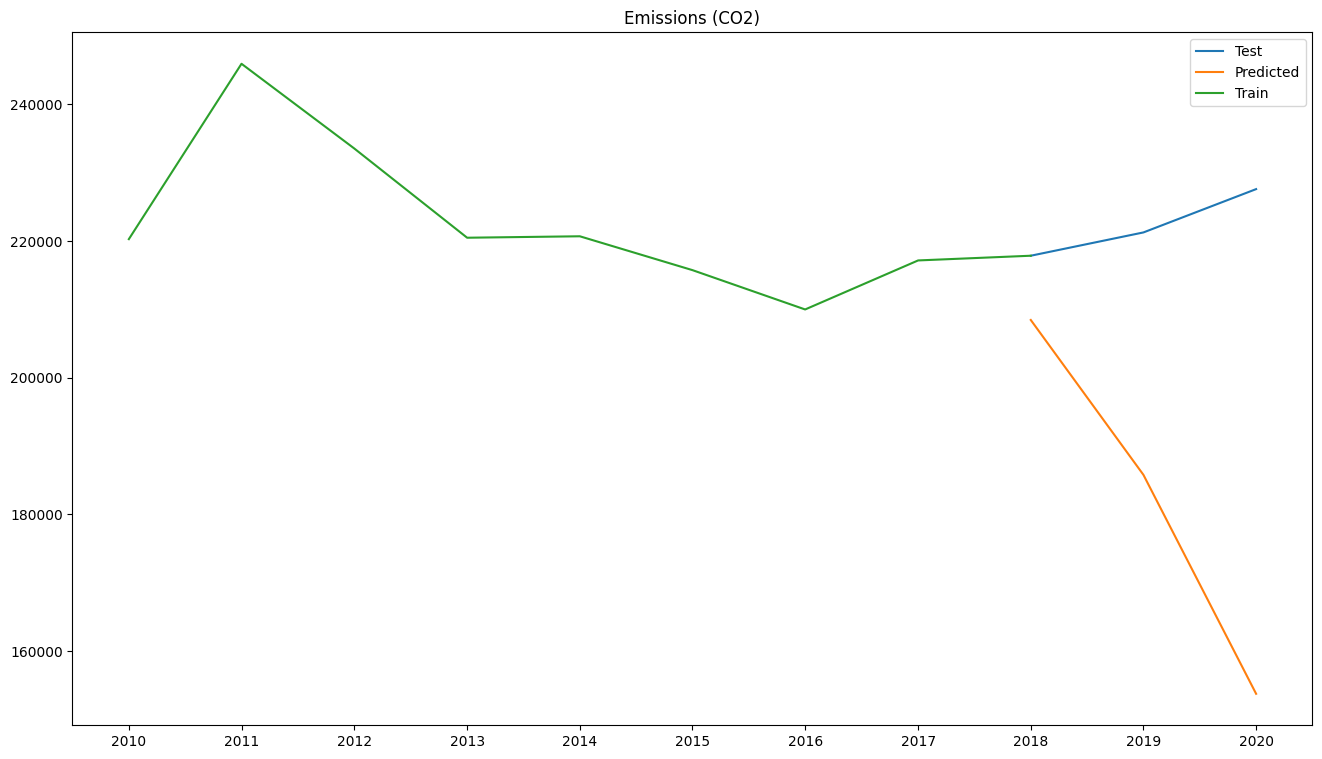

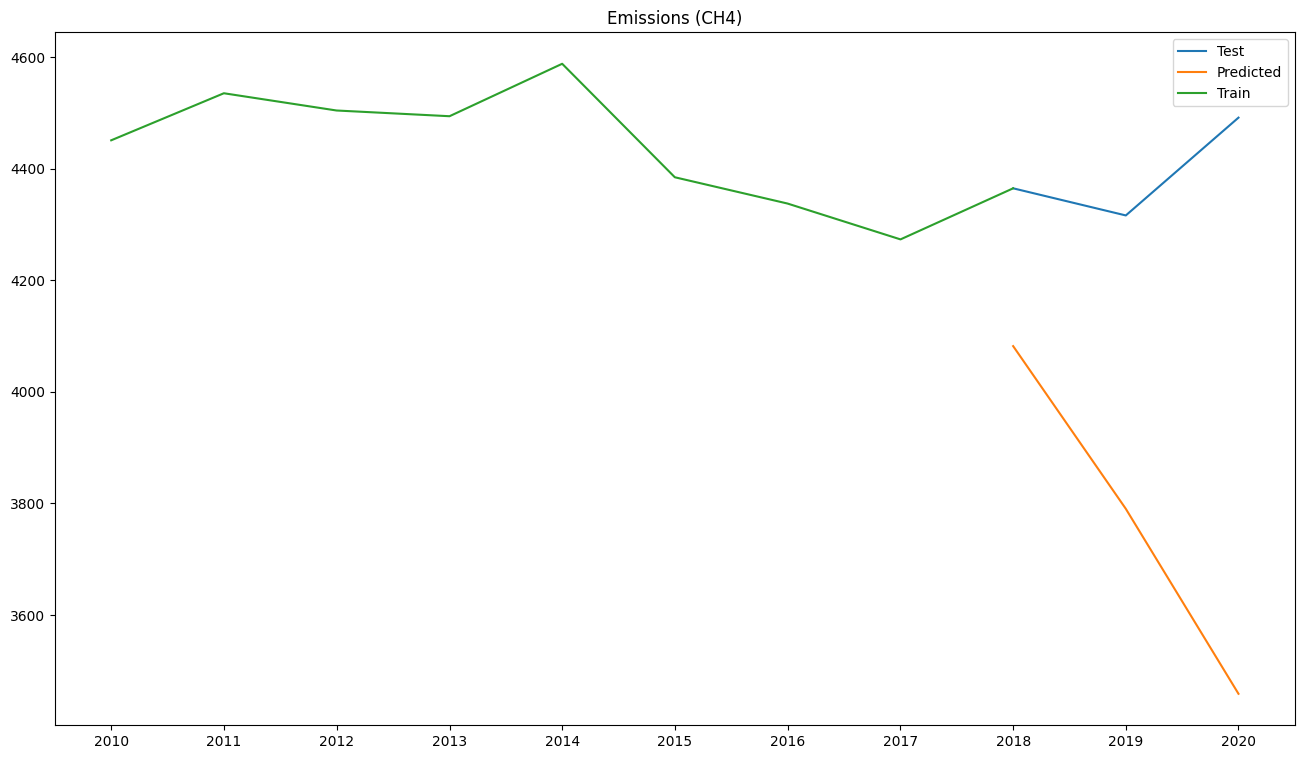

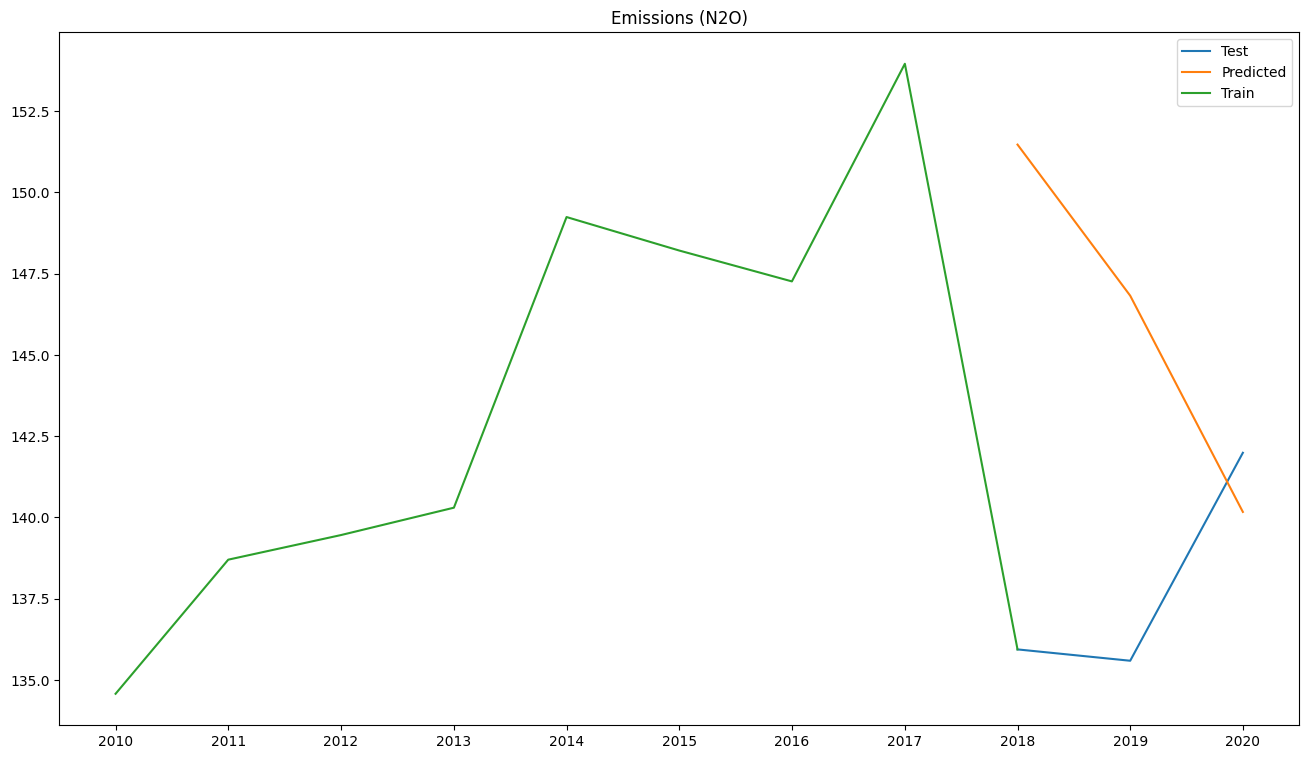

In [73]:
model_training(vis_data, test_samples=3, varmax_order=(2,0))

### Forecast Pipeline

In [74]:
def forecast_data(model, start_year: int, end_year: int):
    """
    Takes model, forcast start_year and end_year as input and
    returns dataframe with forecast data.
    """
    
    # set date range to forecast
    start = dt.datetime(year=start_year, month=1, day=1)
    end = dt.datetime(year=end_year, month=1, day=1)

    # Make forecasts
    predict = model.get_prediction(start=start, end=end)
    forecast = predict.predicted_mean
    
    # Format dataframe
    forecast.columns=['Emissions (CH4)_predicted', 
                         'Emissions (CO2)_predicted', 
                         'Emissions (N2O)_predicted']
    
    return forecast


def visual_forecast(predictions: pd.DataFrame, vis_data: pd.DataFrame, country: str):
    """
    Takes forecast dataframe, existing data dataframe and country name as input and
    visualizes and overlay of existing data and forecast data fro each column of data
    """
    
    # plot CO2 data (because CO2 values are very high compared to the other Elements)
    plt.figure(figsize=(16,9))
    plt.title(f'Emissions (CO2) from {country}', weight='bold')
    plt.plot(predictions['Emissions (CO2)_predicted'], label = 'Forecast') 
    plt.plot(vis_data['Emissions (CO2)'], label= 'Current')
    plt.xlabel('Years', weight='bold')
    plt.ylabel('Emissions (KiloTonnes)', weight='bold')
    plt.legend()
    
    plt.figure(figsize=(16,9))
    plt.title(f'Emissions (CH4) from {country}', weight='bold')
    plt.plot(predictions['Emissions (CH4)_predicted'], label = 'Forecast') 
    plt.plot(vis_data['Emissions (CH4)'], label= 'Current')
    plt.xlabel('Years', weight='bold')
    plt.ylabel('Emissions (KiloTonnes)', weight='bold')
    plt.legend()
    
    plt.figure(figsize=(16,9))
    plt.title(f'Emissions (N2O) from {country}', weight='bold')    
    plt.plot(predictions['Emissions (N2O)_predicted'], label = 'Forecast') 
    plt.plot(vis_data['Emissions (N2O)'], label= 'Current')
    plt.xlabel('Years', weight='bold')
    plt.ylabel('Emissions (KiloTonnes)', weight='bold')
    plt.legend()

# Grand Pipeline

In [75]:
def run(vis_data: pd.DataFrame, tune: bool=True):
    """
    Takes clean data and tune boolean value. Runs stat test pipeline
    and tune pipeline if tune is set to true, else, skips tuning and 
    runs model pipeline based on set parameters
    
    Returns fit model
    """
    
    stat_tests(vis_data)
    
    if tune == True:
        tune_model(vis_data, test_samples=3, max_pd_val=3)
    
    result = model_training(vis_data, test_samples=3, varmax_order=(2,0))
    
    return result

# Demo

Run data, stat and model pipelines

In [76]:
# Specify country and get cleaned data for that country
country = 'United States of America'
vis_data = clean_country_data(country, dataset)

Data Visualization
Visualize Data:

Stationarity Test
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Augumented Dickey-Fuller Test: Emissions (CH4)

Test Statistic              -1.745922e+01
p-value                      4.607128e-30
No. of lags Used             8.000000e+00
No. of obsv used             1.100000e+01
Confidence Interval (1%)    -4.223238e+00
Confidence Interval (5%)    -3.189369e+00
Confidence Interval (10%)   -2.729839e+00
dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Augumented Dickey-Fuller Test: Emissions (CO2)

Test Statistic               -4.588729
p-value                       0.000135
No. of lags Used              6.000000
No. of obsv used             13.000000
Confidence Interval (1%)     -4.068854
Confidence Interval (5%)     -3.127149
Confidence Interval (10%)    -2.701730
dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Augumented Dickey-Fuller Test: Emissio

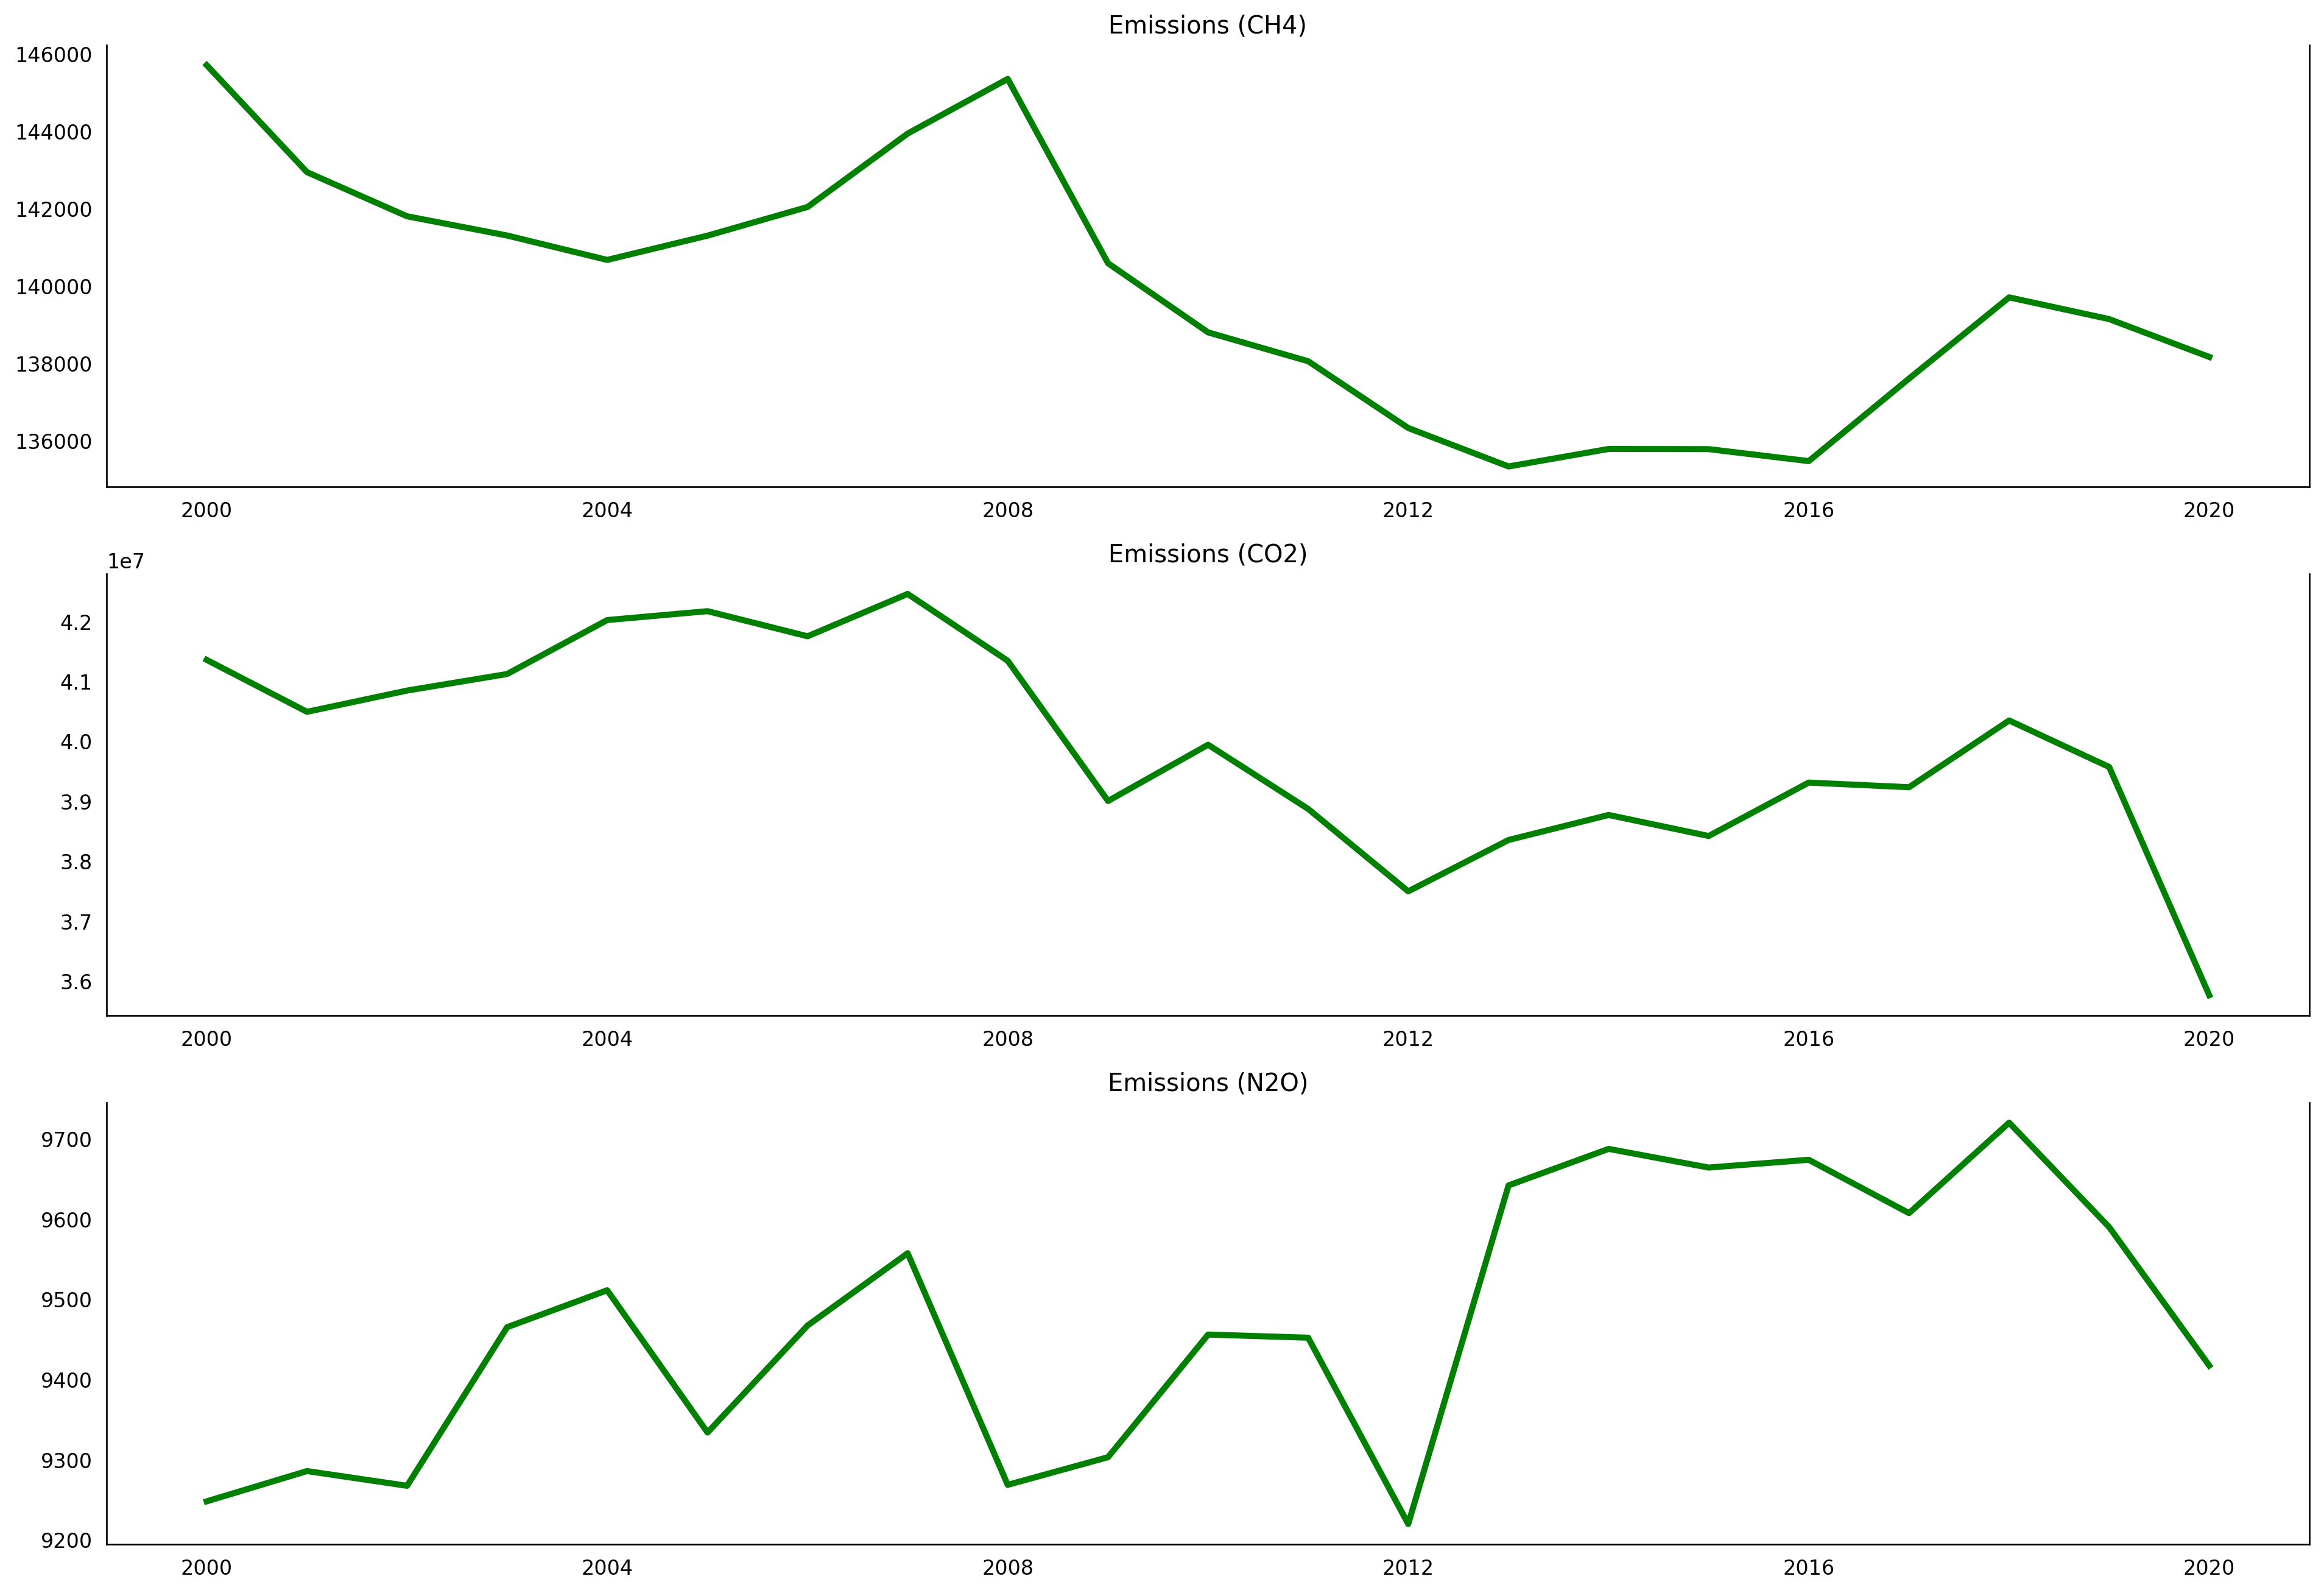

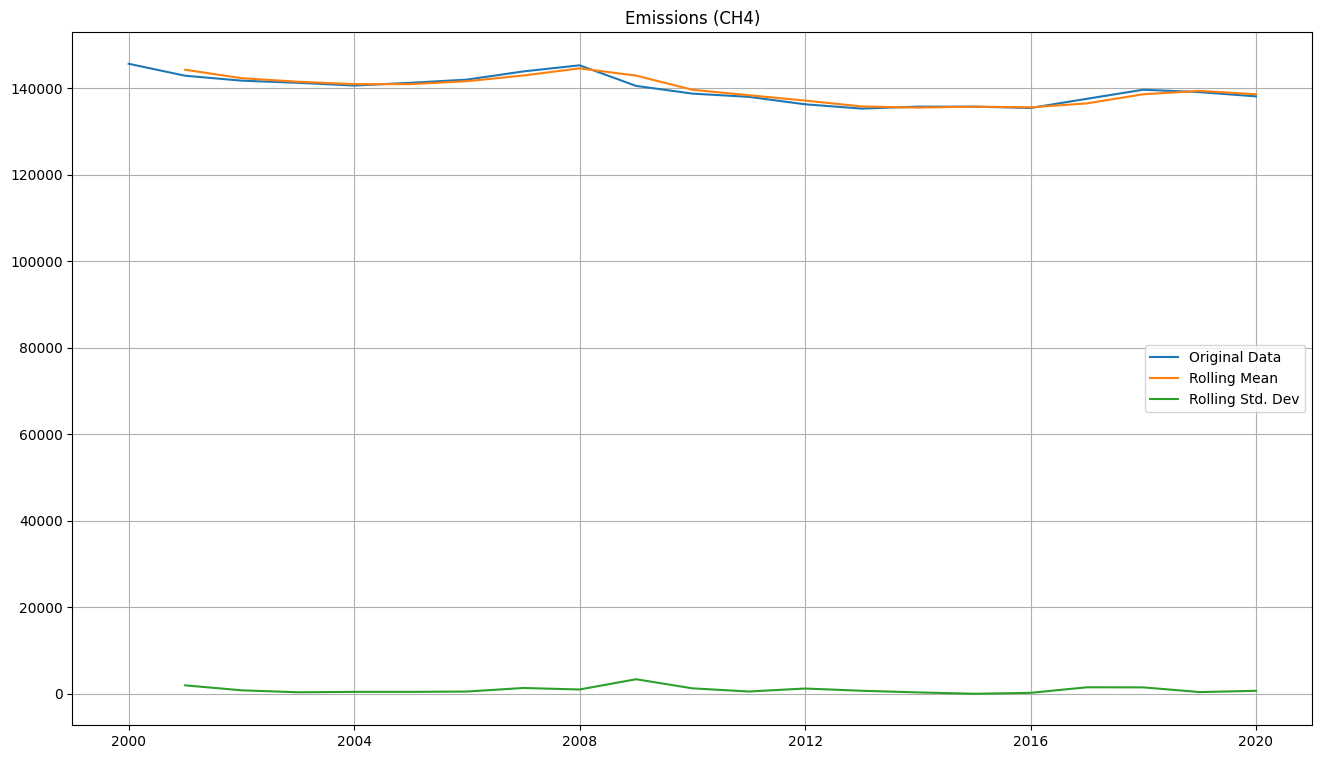

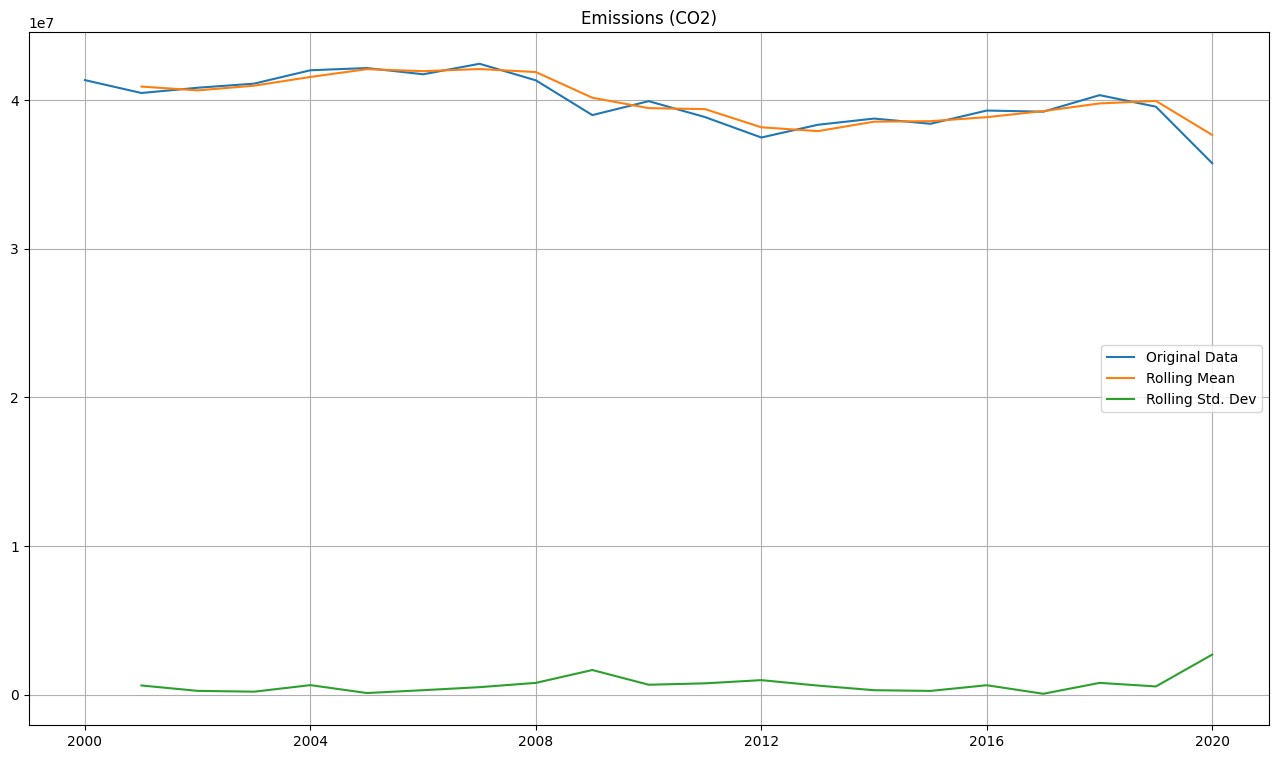

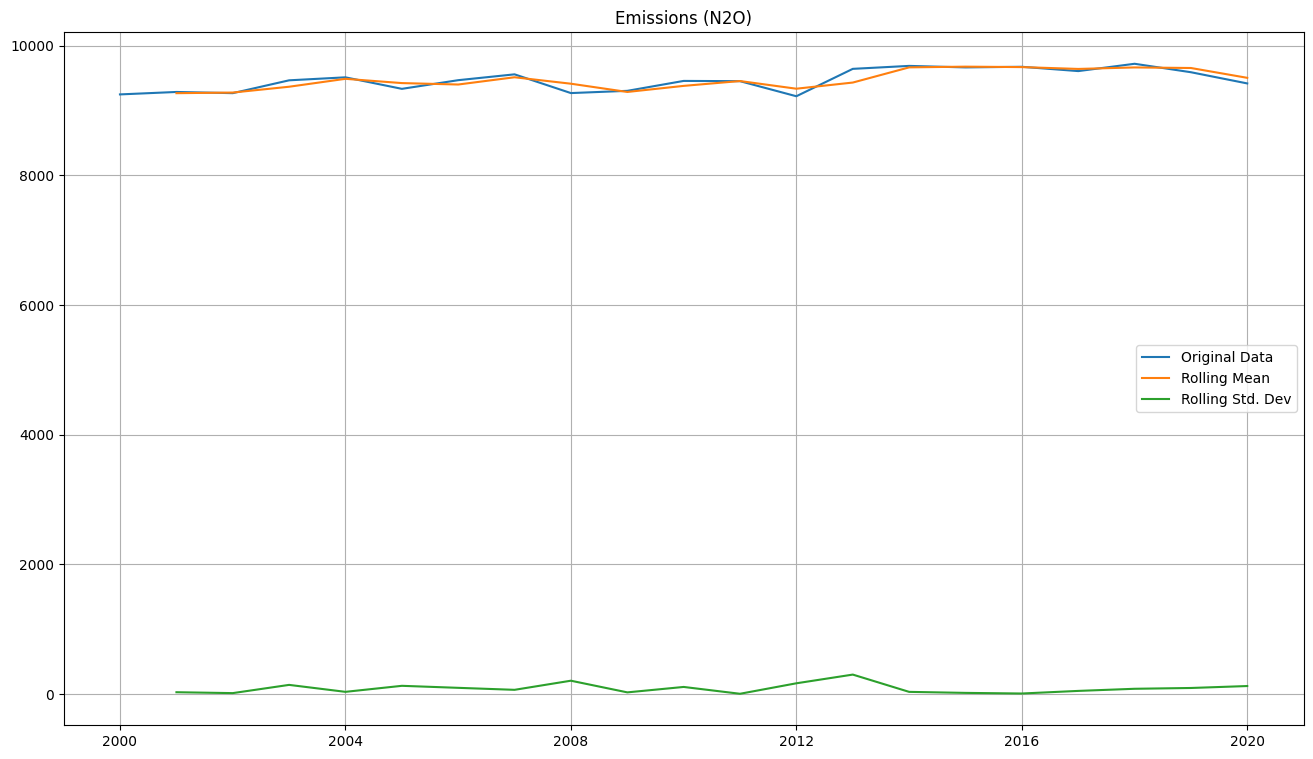

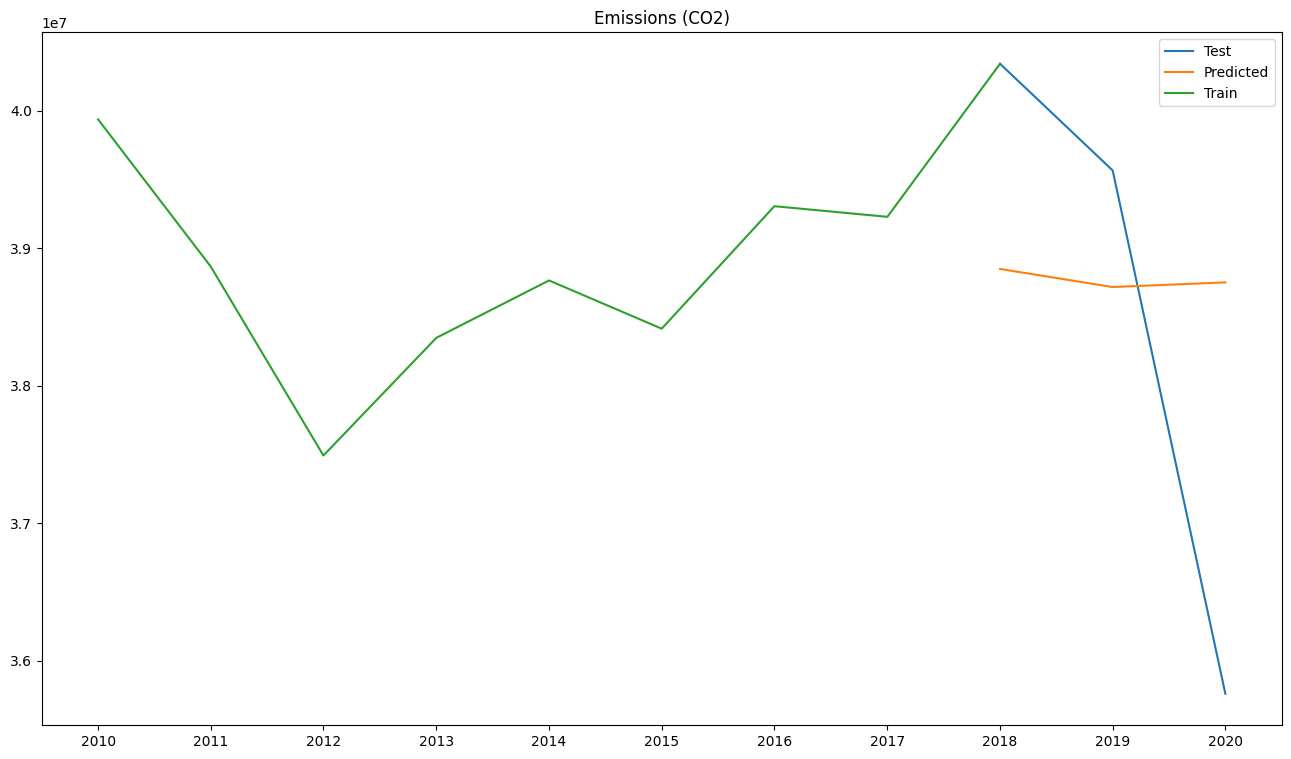

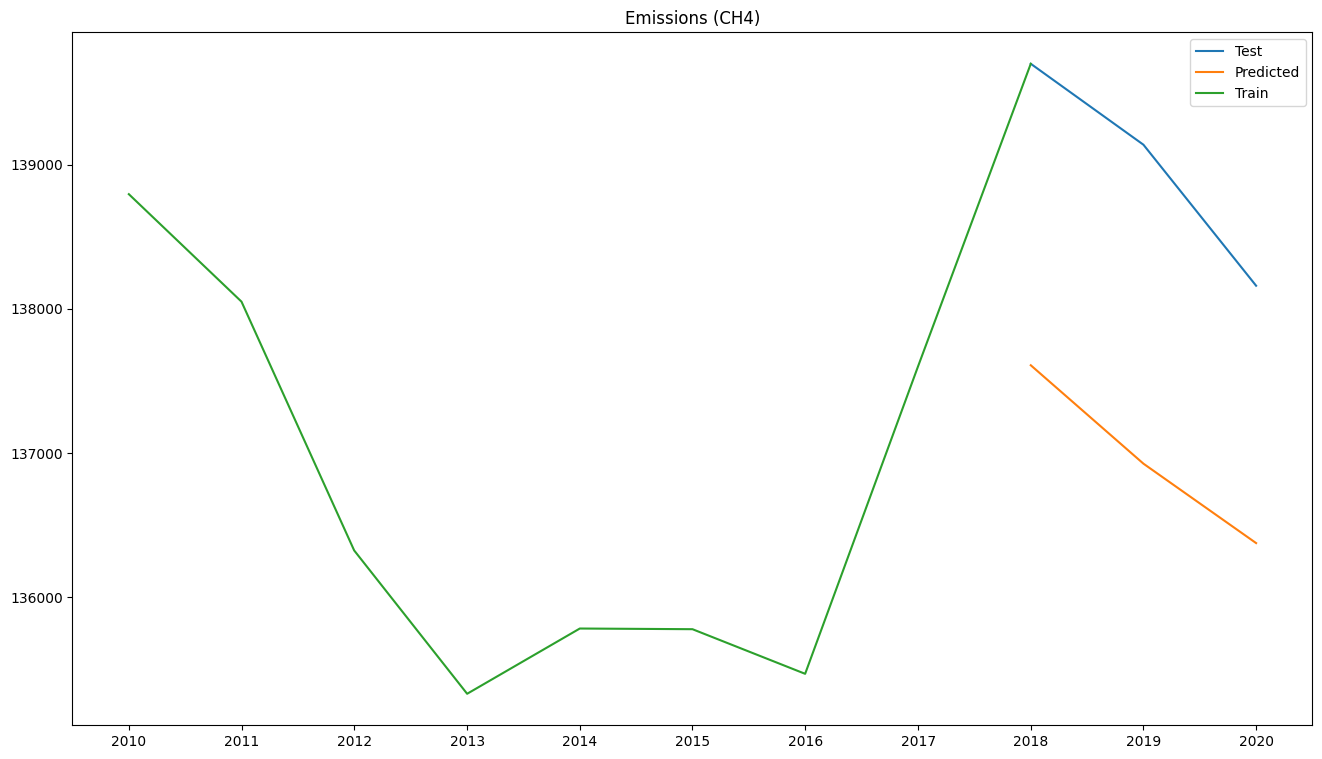

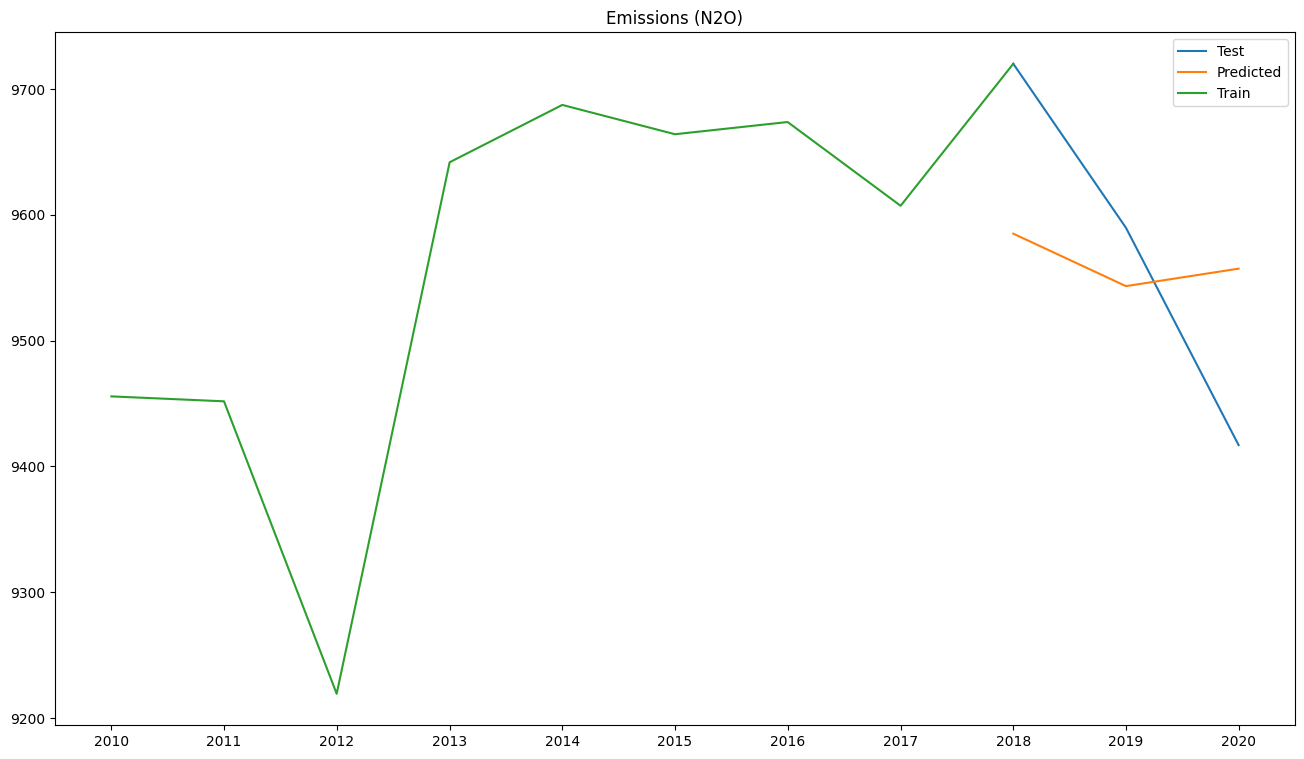

In [77]:
# Run grand pipeline based on country data
result = run(vis_data, tune=False)

Make forecasts with model

In [78]:
# Generate forecast data

forecast_start = 2020
forecast_end = 2030

ten_yr_forecast = forecast_data(result, forecast_start, forecast_end)
ten_yr_forecast

,Emissions (CH4)_predicted,Emissions (CO2)_predicted,Emissions (N2O)_predicted
2020-01-01,136376.542729,3.875131e+07,9557.204546
2021-01-01,136410.879213,3.901198e+07,9596.685538
2022-01-01,136845.619993,3.920816e+07,9604.379124
2023-01-01,137213.110226,3.925487e+07,9587.038484
2024-01-01,137355.135504,3.925261e+07,9569.553869
2025-01-01,137392.271549,3.928179e+07,9562.678328
2026-01-01,137462.050756,3.934892e+07,9562.626449
2027-01-01,137593.205088,3.942239e+07,9562.024793
2028-01-01,137740.694240,3.947978e+07,9558.140312
2029-01-01,137864.663711,3.952242e+07,9552.747600


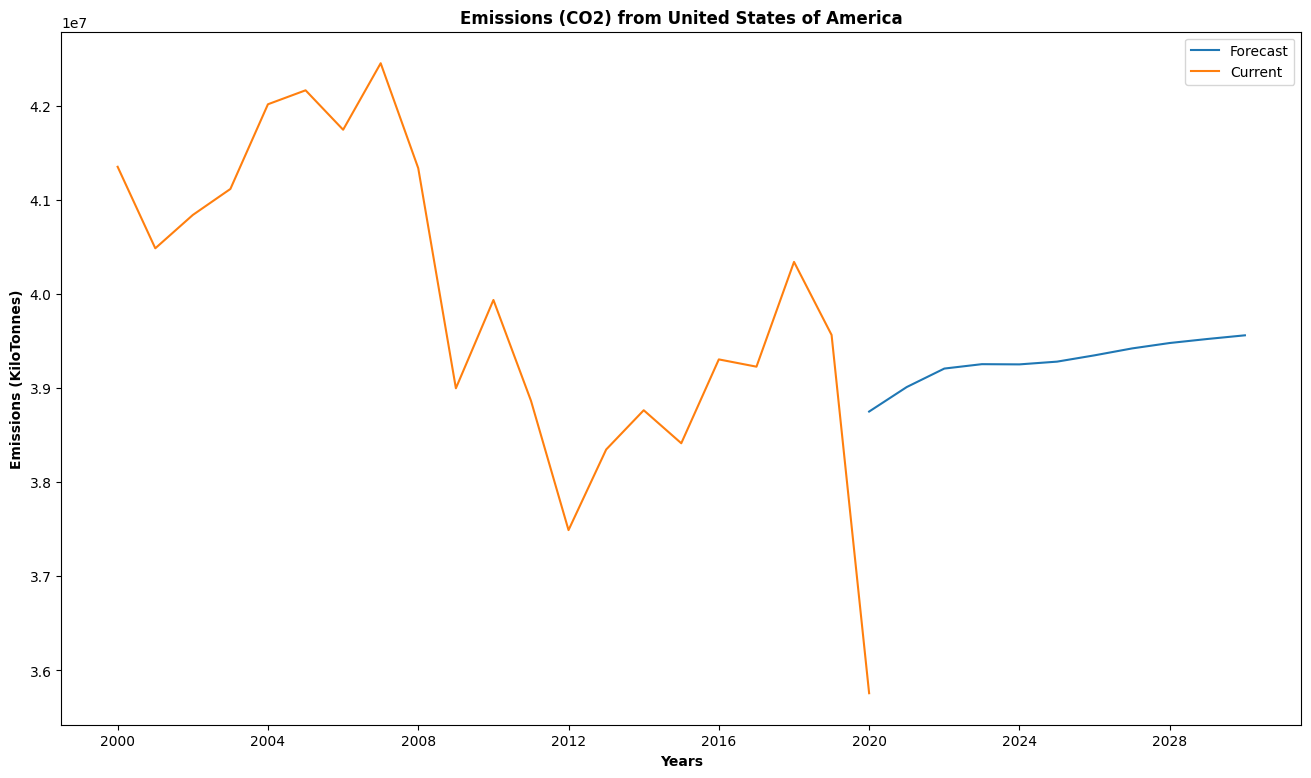

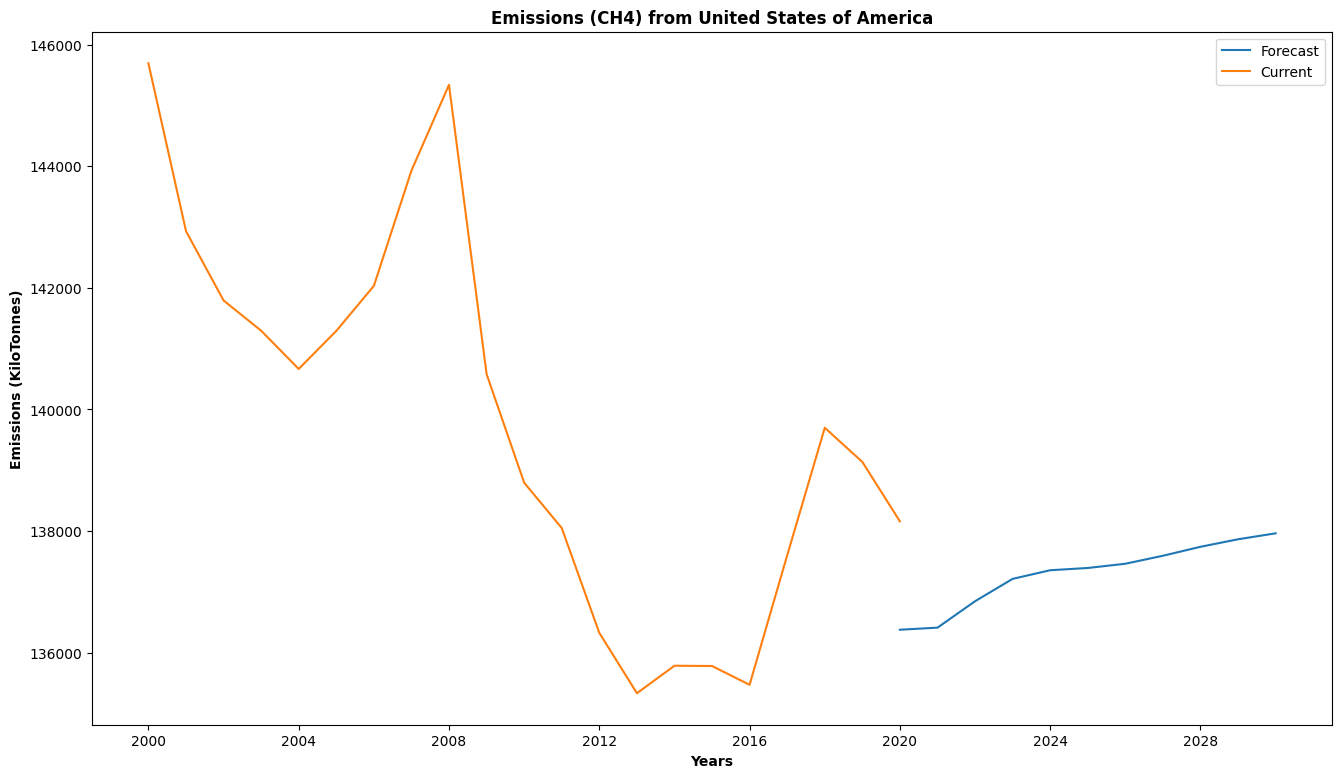

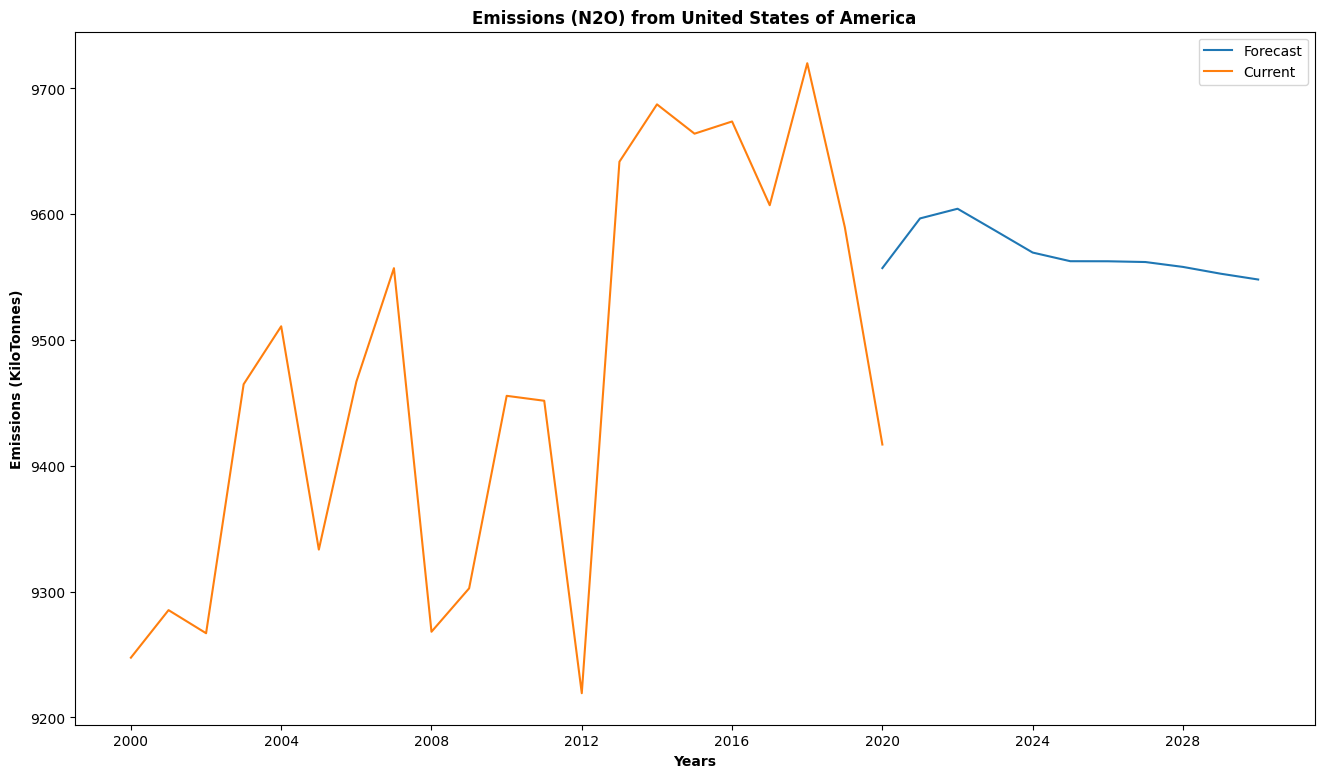

In [79]:
# Visualize overlay of existing data and forecast data
visual_forecast(predictions=ten_yr_forecast, vis_data=vis_data, country=country)